This file is used to obtain the information which are required to complete the following...

1. Just the 1 instruction
2. 3 Sequences of instructions.
3. 3 sequences of instructions along with direct register values at each instruction of the sequences.
4. 3 sequences of instructions along with the full state (i.e. all register values in the same order.)
5. 3 sequences of instructions along with the full state and 3 prior instruction signals. (Required for Transformer)

Thus what we need to obtain is...
- Prior and target instructions (sequence).
- Direct register values for each instruction in the sequence.
- Full state at the time of executing the target instruction.
- EM signal (with length limit) of the prior instructions.

All of which needs to be adjusted based on a given number indicating the amount of instructions to be considered in the sequence.

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import random
import tensorflow as tf
import numpy as np
import timeit
from sklearn import metrics
import scipy.io as sio
import csv
import os
import math 
import random as rand
from numpy import genfromtxt
from numpy import sum,isrealobj,sqrt
from numpy.random import standard_normal
import string

#import torch
#from torch import nn

import warnings
from scipy.spatial import distance


from importlib import reload
import sys
sys.path.append("../Imports/") # Adds higher directory to python modules path.

from Modules.Tools import MapTool
from Modules.Tools import BoxPlot
from Modules.Tools import Extractor
from Modules.Tools import peakCorrelation as pC
from Modules.Tools import ATmega2560_Instructions as Inst_Info

# Notebook Parameters
- this is simply for obtaining the graphs with manual mapping. Pad is closely relate to the sampling rate for the EM signal.

In [61]:
save_folder = ""
load_signal_folder = "../Datasets/Signals/Numpy/segment_good/"
load_code_folder = "../Datasets/Instruction_Code/"
pad = 8
y_low=-2.8
y_high=2.8
amount=3200

# Load Program Code

In [3]:
Base_Benign_Code = np.load(load_code_folder + "Base_Benign.npy").tolist()
Base_Anom_Code = np.load(load_code_folder + "Base_Anom.npy").tolist()

In [4]:
Update_50_A_Benign_Code = np.load(load_code_folder + "Update_50_A_Benign.npy").tolist()
Update_50_B_Benign_Code = np.load(load_code_folder + "Update_50_B_Benign.npy").tolist()
Update_50_C_Benign_Code = np.load(load_code_folder + "Update_50_C_Benign.npy").tolist()

Update_50_A_Anom_Code = np.load(load_code_folder + "Update_50_A_Anom.npy").tolist()
Update_50_B_Anom_Code = np.load(load_code_folder + "Update_50_B_Anom.npy").tolist()
Update_50_C_Anom_Code = np.load(load_code_folder + "Update_50_C_Anom.npy").tolist()

In [5]:
Update_75_A_Benign_Code = np.load(load_code_folder + "Update_75_A_Benign.npy").tolist()
Update_75_B_Benign_Code = np.load(load_code_folder + "Update_75_B_Benign.npy").tolist()
Update_75_C_Benign_Code = np.load(load_code_folder + "Update_75_C_Benign.npy").tolist()

Update_75_A_Anom_Code = np.load(load_code_folder + "Update_75_A_Anom.npy").tolist()
Update_75_B_Anom_Code = np.load(load_code_folder + "Update_75_B_Anom.npy").tolist()
Update_75_C_Anom_Code = np.load(load_code_folder + "Update_75_C_Anom.npy").tolist()

In [6]:
Update_100_A_Benign_Code = np.load(load_code_folder + "Update_100_A_Benign.npy").tolist()
Update_100_B_Benign_Code = np.load(load_code_folder + "Update_100_B_Benign.npy").tolist()
Update_100_C_Benign_Code = np.load(load_code_folder + "Update_100_C_Benign.npy").tolist()

Update_100_A_Anom_Code = np.load(load_code_folder + "Update_100_A_Anom.npy").tolist()
Update_100_B_Anom_Code = np.load(load_code_folder + "Update_100_B_Anom.npy").tolist()
Update_100_C_Anom_Code = np.load(load_code_folder + "Update_100_C_Anom.npy").tolist()

In [7]:
Train_Program_1_Code = np.load(load_code_folder + "Train_Program_1.npy").tolist()
Train_Program_2_Code = np.load(load_code_folder + "Train_Program_2.npy").tolist()
Train_Program_3_Code = np.load(load_code_folder + "Train_Program_3.npy").tolist()
Train_Program_4_Code = np.load(load_code_folder + "Train_Program_4.npy").tolist()

# Load Signals

In [9]:
Base_Benign = np.load(load_signal_folder + "Base_Benign.npy", allow_pickle=True)
Base_Anom = np.load(load_signal_folder + "Base_Anom.npy", allow_pickle=True)

In [10]:
Update_50_A_Benign = np.load(load_signal_folder + "Update_50_A_Benign.npy", allow_pickle=True)
Update_50_B_Benign = np.load(load_signal_folder + "Update_50_B_Benign.npy", allow_pickle=True)
Update_50_C_Benign = np.load(load_signal_folder + "Update_50_C_Benign.npy", allow_pickle=True)

Update_50_A_Anom = np.load(load_signal_folder + "Update_50_A_Anom.npy", allow_pickle=True)
Update_50_B_Anom = np.load(load_signal_folder + "Update_50_B_Anom.npy", allow_pickle=True)
Update_50_C_Anom = np.load(load_signal_folder + "Update_50_C_Anom.npy", allow_pickle=True)

In [11]:
Update_75_A_Benign = np.load(load_signal_folder + "Update_75_A_Benign.npy", allow_pickle=True)
Update_75_B_Benign = np.load(load_signal_folder + "Update_75_B_Benign.npy", allow_pickle=True)
Update_75_C_Benign = np.load(load_signal_folder + "Update_75_C_Benign.npy", allow_pickle=True)

Update_75_A_Anom = np.load(load_signal_folder + "Update_75_A_Anom.npy", allow_pickle=True)
Update_75_B_Anom = np.load(load_signal_folder + "Update_75_B_Anom.npy", allow_pickle=True)
Update_75_C_Anom = np.load(load_signal_folder + "Update_75_C_Anom.npy", allow_pickle=True)

In [12]:
Update_100_A_Benign = np.load(load_signal_folder + "Update_100_A_Benign.npy", allow_pickle=True)
Update_100_B_Benign = np.load(load_signal_folder + "Update_100_B_Benign.npy", allow_pickle=True)
Update_100_C_Benign = np.load(load_signal_folder + "Update_100_C_Benign.npy", allow_pickle=True)

Update_100_A_Anom = np.load(load_signal_folder + "Update_100_A_Anom.npy", allow_pickle=True)
Update_100_B_Anom = np.load(load_signal_folder + "Update_100_B_Anom.npy", allow_pickle=True)
Update_100_C_Anom = np.load(load_signal_folder + "Update_100_C_Anom.npy", allow_pickle=True)

In [13]:
Train_Program_1 = np.load(load_signal_folder + "Train_Program_1.npy", allow_pickle=True)
Train_Program_2 = np.load(load_signal_folder + "Train_Program_2.npy", allow_pickle=True)
Train_Program_3 = np.load(load_signal_folder + "Train_Program_3.npy", allow_pickle=True)
Train_Program_4 = np.load(load_signal_folder + "Train_Program_4.npy", allow_pickle=True)

# Group signals and code into one numpy array for later use.

In [14]:
train_Set_Signals = []
train_Set_Signals.append(Train_Program_1)
train_Set_Signals.append(Train_Program_2)
train_Set_Signals.append(Train_Program_3)
train_Set_Signals.append(Train_Program_4)
train_Set_Signals = np.array(train_Set_Signals, dtype=object)

In [15]:
train_Set_Codes = []
train_Set_Codes.append(Train_Program_1_Code)
train_Set_Codes.append(Train_Program_2_Code)
train_Set_Codes.append(Train_Program_3_Code)
train_Set_Codes.append(Train_Program_4_Code)
train_Set_Codes = np.array(train_Set_Codes, dtype=object)

# Create a method to read a text file and obtain the following Information.

- Prior and target instructions (sequence).
- Direct register values for each instruction in the sequence.
- Full state at the time of executing the target instruction.
- EM signal (with length limit) of the prior instructions.

In [16]:
'''
Checks if string s is a hex number
'''
def is_hex(s):
    return all(c in string.hexdigits for c in s)

In [17]:
'''
I dentify is there a specific word to analyze such as code.
'''
def isInst(word):
    if ";" in word or "/" in word:
        #print("Found a note")
        #print(word)
        return False
    elif ":" in word:
        #print("Found a jmp point")
        #print(word)
        return False
    else:
        return True

In [18]:
'''
Identify the code instruction.
'''
def actualRegOrValue(command, Command):
    new_command = command
    if "," in command:
        new_command = command[:len(command)-1]
    
    if "br" in new_command:
        if "TRUE" in Command or "TRUE." in Command or "true" in Command or "true." in Command:
            new_command = new_command + "-t"
        elif "FALSE" in Command or "FALSE." in Command or "false" in Command or "false." in Command:
            new_command = new_command + "-f"
            
    return new_command

In [19]:
def GetActualCommand(Command):
    actualCommand = []
    for command in Command:
        actualCommand.append(actualRegOrValue(command, Command))
        
    return actualCommand

In [20]:
'''
Identify the value of a two register information.
'''
def get2RegValue(v1, v2):
    v1_bin = bin(v1)[2:].zfill(8)
    v2_bin = bin(v2)[2:].zfill(8)
    
    #print(v1_bin)
    #print(v2_bin)
    
    #v1_ext = bin(v1<<8)
    ans = int(v1_bin + v2_bin,2)
    
    #print(v1_bin)
    #print(v2_bin)
    
    #print(bin(v1<<8)[2:])
    #print(ans)
    #print(int(ans, 2))
    return ans

In [21]:
'''
Returns the registers in the command.
'''
def getRegs(command):
    r1 = ""
    r2 = ""
    if ":" in command:
        loc = 0
        for i in range(len(command)):
            if command[i] == ":":
                loc = i
        r1 = command[:loc]
        r2 = command[loc+1:]
        
    else:
        print("ERROR: no two registers seen.")
        
    return r1, r2

In [22]:
def Opt2Regs(Opt, v1, v2, value):
    maxnum = int('1111111111111111',2)
    v1_bin = bin(v1)[2:].zfill(8)
    v2_bin = bin(v2)[2:].zfill(8)
    
    #print(v1_bin)
    #print(v2_bin)
    
    #v1_ext = bin(v1<<8)
    ans = int(v1_bin + v2_bin,2)
    #print(ans)
    
    if Opt == "adiw":
        ans = ans + value
        if ans > maxnum:
            ans = ans - maxnum -1
    elif Opt == "sbiw":
        ans = ans - value
        if ans < -1:
            ans = maxnum + ans +1
    
    ans = bin(ans)[2:].zfill(16)
    #print(ans)
    
    r1 = int(ans[:8],2)
    r2 = int(ans[8:],2)
    
    #print(r1)
    #print(r2)
    
    return r1, r2

In [23]:
def getInt(value):
    if "x" in value:
        return int(value[2:])
    else:
        return int(value)

In [24]:
class Register:
    def __init__(self, name, value):
        self.name = name
        self.value = value

    def getName(self):
        return self.name
    
    def getValue(self):
        return self.value
    
    def changeValue(self, new_value):
        self.value = new_value

class Registers:
    def __init__(self):
        self.rList = [Register("r0",0),
                            Register("r1",0),
                            Register("r2",0),
                            Register("r3",0),
                            Register("r4",0),
                            Register("r5",0),
                            Register("r6",0),
                            Register("r7",0),
                            Register("r8",0),
                            Register("r9",0),
                            Register("r10",0),
                            Register("r11",0),
                            Register("r12",0),
                            Register("r13",0),
                            Register("r14",0),
                            Register("r15",0),
                            Register("r16",0),
                            Register("r17",0),
                             Register("r18",0),
                             Register("r19",0),
                             Register("r20",0),
                             Register("r21",0),
                             Register("r22",0),
                             Register("r23",0),
                             Register("r24",0),
                             Register("r25",0),
                             Register("r26",0),
                             Register("r27",0),
                             Register("r28",0),
                             Register("r29",0),
                             Register("r30",0),
                             Register("r31",0),
                             Register("$0A00",0),
                             Register("$0A30",0),
                             Register("$0A50",0),
                             Register("$0A80",0),
                             Register("0x0200",0),
                             Register("0x0201",0),
                             Register("0x0202",0),
                             Register("0x0203",0),
                             Register("0x3e",0),
                             Register("0x3f",0),
                             Register("0x3d",0),
                             # note: in operation on port 4 returns 68 for some reason
                             Register("4",68)]
        
        self.stack=[]
        # This is to store prior executions values when executing them.
        ## Note: the stored values is [current value in register1, current value in register 2] for each instruction.
        ## Note: current value referse to the values for the registers BEFORE executing the instruction. I.E. what is passed to it.
        #self.prior_Values=[-1,-1,-1,-1,-1,-1,-1,-1]
        
    def inRList(self, name):
        for i in range(len(self.rList)):
            if self.rList[i].getName() == name:
                return True
        else:
            return False
    
    def changeRegisterValue(self, name, value):
        for i in range(len(rList)):
            if self.rList[i].getName() == name:
                self.rList[i].changeValue(value)
                
    def printRegValues(self):
        for i in range(len(self.rList)):
            print("Name: " + self.rList[i].getName() + " Value: " + str(hex(self.rList[i].getValue()))[2:])
       
    def getLoc(self, name):
        for i in range(len(self.rList)):
            if self.rList[i].getName() == name:
                return i
            
    def getValue(self, command):
        value = self.rList[self.getLoc(command)].getValue()
        return value
    
    def changeValue(self, command, value):
        self.rList[self.getLoc(command)].changeValue(value)
        
    def getState(self):
        state = []
        state.append(self.getValue("r0"))
        state.append(self.getValue("r1"))
        state.append(self.getValue("r2"))
        state.append(self.getValue("r3"))
        state.append(self.getValue("r4"))
        state.append(self.getValue("r5"))
        state.append(self.getValue("r6"))
        state.append(self.getValue("r7"))
        state.append(self.getValue("r8"))
        state.append(self.getValue("r9"))
        state.append(self.getValue("r10"))
        state.append(self.getValue("r11"))
        state.append(self.getValue("r12"))
        state.append(self.getValue("r13"))
        state.append(self.getValue("r14"))
        state.append(self.getValue("r15"))
        state.append(self.getValue("r16"))
        state.append(self.getValue("r17"))
        state.append(self.getValue("r18"))
        state.append(self.getValue("r19"))
        state.append(self.getValue("r20"))
        state.append(self.getValue("r21"))
        state.append(self.getValue("r22"))
        state.append(self.getValue("r23"))
        state.append(self.getValue("r24"))
        state.append(self.getValue("r25"))
        state.append(self.getValue("r26"))
        state.append(self.getValue("r27"))
        state.append(self.getValue("r28"))
        state.append(self.getValue("r29"))
        state.append(self.getValue("r30"))
        state.append(self.getValue("r31"))
        
        return state
    
    # performs the operation and stores the new value in the register.
    ## Note, for the Training Set files I programed them to only skip 
    ## one instruction when a branch, call, or jump occurs for simplicity.
    ## Additionally, c will always be 0 for adc
    def performOp(self, Command):
        skip = 0
        
        ACommand = GetActualCommand(Command)
        current_Values = []
        new_Values = []
        maxnum = int('11111111',2)
        
        state = self.getState()
        
        # All possible commands and operations
        if ACommand[0] == "adc":
            ## get current
            v1 = self.getValue(ACommand[1]) 
            v2 = self.getValue(ACommand[2])
            current_Values = [v1, v2]
            
            c = int(ACommand[4])
            
            if c != 0 and c != 1:
                print("Error: could not determine c flag for adc operation.")
            
            ## perform Action
            ans = v1 + v2 + c
            if ans > maxnum:
                ans = ans - maxnum -1
            self.changeValue(ACommand[1], ans)
            ## get new values
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            new_Values = [v1, v2]
        
        elif ACommand[0] == "add":
            ## get current
            v1 = self.getValue(ACommand[1]) 
            v2 = self.getValue(ACommand[2])
            current_Values = [v1, v2]
            ## perform Action
            ans = v1 + v2 
            if ans > maxnum:
                ans = ans - maxnum -1
            self.changeValue(ACommand[1], ans)
            ## get new values
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            new_Values = [v1, v2]
            
        elif ACommand[0] == "adiw":
            # get current
            if ":" in ACommand[1]:
                r1, r2 = getRegs(ACommand[1])
                r1v = self.getValue(r1)
                r2v = self.getValue(r2)
                v1 = get2RegValue(r1v, r2v)
                v2 = getInt(ACommand[2])
                current_Values = [v1, v2]
                # perform Action
                nv1, nv2 = Opt2Regs(ACommand[0], r1v, r2v, int(ACommand[2]))
                self.changeValue(r1, nv1)
                self.changeValue(r2, nv2)
                ## get new values
                v1 = self.getValue(r1)
                v2 = self.getValue(r2)
                new_Values = [v1, v2]
            else:
                # get current
                v1 = self.getValue(ACommand[1])
                v2 = getInt(ACommand[2])
                current_Values = [v1]
                # perform Action
                ans = v1 + v2
                self.changeValue(ACommand[1], ans)
                ## get new values
                v1 = self.getValue(ACommand[1])
                new_Values = [v1]
            
        elif ACommand[0] == "andi":
            # get current
            v1 = self.getValue(ACommand[1])
            v2 = getInt(ACommand[2])
            current_Values = [v1, v2]
            # perform Action
            ans = v1 & v2
            self.changeValue(ACommand[1], ans)
            ## get new values
            v1 = self.getValue(ACommand[1])
            new_Values = [v1]
            
        elif ACommand[0] == "brne-t" or ACommand[0] == "breq-t" or ACommand[0] == "brcc-t" or ACommand[0] == "brlo-t":
            # get current
            # perform Action
            skip=1
            
        elif ACommand[0] == "brne-f" or ACommand[0] == "breq-f"  or ACommand[0] == "brcc-f" or ACommand[0] == "brlo-f":
            # get current
            # perform Action
            skip=0
            
        elif ACommand[0] == "call":
            # get current
            # perform Action
            skip=0
        
        elif ACommand[0] == "clr":
            # get current
            v1 = self.getValue(ACommand[1])
            v2 = 0
            current_Values = [v1]
            # perform Action
            self.changeValue(ACommand[1], v2)
            ## get new values
            v1 = self.getValue(ACommand[1])
            new_Values = [v1]
    
        elif ACommand[0] == "clc":
            skip = 0
            
        elif ACommand[0] == "cln":
            skip = 0
        
        elif ACommand[0] == "clz":
            skip = 0
            
        elif ACommand[0] == "cli":
            skip = 0
            
        elif ACommand[0] == "cls":
            skip = 0
            
        elif ACommand[0] == "clv":
            skip = 0
            
        elif ACommand[0] == "clt":
            skip = 0
            
        elif ACommand[0] == "clh":
            skip = 0
            
        elif ACommand[0] == "cp":
            # get current
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            current_Values = [v1,v2]
            new_Values = [v1,v2]
            
        elif ACommand[0] == "cpi":
            # get current
            v1 = self.getValue(ACommand[1])
            v2 = int(ACommand[2])
            current_Values = [v1,v2]
            new_Values = [v1,v2]
            
        elif ACommand[0] == "dec":
            # get current
            v1 = self.getValue(ACommand[1])
            current_Values = [v1]
            
            # perform Action
            ans = v1 - 1
            
            if v1 < 0:
                ans = maxnum
            
            self.changeValue(ACommand[1], ans)
            ## get new values
            v1 = self.getValue(ACommand[1])
            new_Values = [v1]
            
        elif ACommand[0] == "eor":
            # get current
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            current_Values = [v1, v2]
            # perform Action
            ans = v1 ^ v2
            self.changeValue(ACommand[1], ans)
            ## get new values
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            new_Values = [v1, v2]
            
        elif ACommand[0] == "in":
            ## Note: the in command is hard to account for as the in takes
            ## input from another device. However for these experiments there is
            ## no direct other device. As such the in returns 0 most of the time.
            # Make sure to check that it does for the program and change if necessary.
            if self.inRList(ACommand[2]):
                v1 = self.getValue(ACommand[1])
                v2 = self.getValue(ACommand[2])
                current_Values = [v1, v2]
                # perform Action
                self.changeValue(ACommand[1], v2)
                ## get new values
                v1 = self.getValue(ACommand[1])
                new_Values = [v1, v2]
            else:
                v1 = self.getValue(ACommand[1])
                v2 = 0
                current_Values = [v1, v2]
                # perform Action
                self.changeValue(ACommand[1], v2)
                ## get new values
                v1 = self.getValue(ACommand[1])
                new_Values = [v1, v2]
                
        elif ACommand[0] == "inc":
            # get current
            v1 = self.getValue(ACommand[1])
            current_Values = [v1]
            
            # perform Action
            ans = v1 + 1
            
            if v1 > maxnum:
                ans = 0
            
            self.changeValue(ACommand[1], ans)
            ## get new values
            v1 = self.getValue(ACommand[1])
            new_Values = [v1]
                    
        elif ACommand[0] == "ldi":
            # get current
            v1 = self.getValue(ACommand[1])
            v2 = getInt(ACommand[2])
            current_Values = [v1, v2]
            # perform Action
            self.changeValue(ACommand[1], v2)
            ## get new values
            v1 = self.getValue(ACommand[1])
            new_Values = [v1]
            
        elif ACommand[0] == "lds":
            # get current
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            current_Values = [v1, v2]
            # perform Action
            self.changeValue(ACommand[1], v2)
            ## get new values
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            new_Values = [v1, v2]
            
        elif ACommand[0] == "mov":
            # get current
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            current_Values = [v1, v2]
            
            # perform Action
            self.changeValue(ACommand[1], v2)
            
            ## get new values
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            new_Values = [v1, v2]
            
            
            
        elif ACommand[0] == "mul":
            ## get current
            v1 = self.getValue(ACommand[1]) 
            v2 = self.getValue(ACommand[2])
            current_Values = [v1, v2]
            ## perform Action
            ans = v1 * v2 
            if ans > maxnum * maxnum:
                ans = ans - (maxnum * maxnum) -1
            ans = bin(ans)[2:].zfill(16)
    
            nv1 = int(ans[:8],2)
            nv2 = int(ans[8:],2)
            
            self.changeValue("r0", nv2)
            self.changeValue("r1", nv1)
            
            ## get new values
            v1 = self.getValue("r0")
            v2 = self.getValue("r1")
            new_Values = [v1, v2]
            
        elif ACommand[0] == "or":
            # get current
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            current_Values = [v1, v2]
            # perform Action
            ans = v1 | v2
            self.changeValue(ACommand[1], ans)
            ## get new values
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            new_Values = [v1, v2]
            
        elif ACommand[0] == "out":
            ## Note: the in command is hard to account for as the in takes
            ## input from another device. However for these experiments there is
            ## no direct other device. As such the in returns 0 every time.
            # get current
            if self.inRList(ACommand[1]):
                v1 = self.getValue(ACommand[1])
                v2 = self.getValue(ACommand[2])
                current_Values = [v1, v2]
                # perform Action
                self.changeValue(ACommand[1], v2)
                ## get new values
                v1 = self.getValue(ACommand[1])
                new_Values = [v1, v2]
            else:
                print("ERROR: out register is not yet established.")
                
        elif ACommand[0] == "nop":
            skip=0
            
        elif ACommand[0] == "pop":
            # get current
            v1 = self.getValue(ACommand[1])
            current_Values = [v1]
            # perform Action
            ans = self.stack.pop()
            self.changeValue(ACommand[1], ans)
            ## get new values
            v1 = self.getValue(ACommand[1])
            new_Values = [v1]
            
        elif ACommand[0] == "push":
            # get current
            v1 = self.getValue(ACommand[1])
            current_Values = [v1]
            # perform Action
            ans = self.stack.append(v1)
          
        elif ACommand[0] == "rjmp":
            # get current
            # perform Action
            skip=1
            
        elif ACommand[0] == "sbiw":
            # get current
            if ":" in ACommand[1]:
                r1, r2 = getRegs(ACommand[1])
                r1v = self.getValue(r1)
                r2v = self.getValue(r2)
                v1 = get2RegValue(r1v, r2v)
                v2 = getInt(ACommand[2])
                current_Values = [v1, v2]
                # perform Action
                nv1, nv2 = Opt2Regs(ACommand[0], r1v, r2v, int(ACommand[2]))
                self.changeValue(r1, nv1)
                self.changeValue(r2, nv2)
                ## get new values
                v1 = self.getValue(r1)
                v2 = self.getValue(r2)
                new_Values = [v1, v2]
            else:
                # get current
                v1 = self.getValue(ACommand[1])
                v2 = getInt(ACommand[2])
                current_Values = [v1]
                # perform Action
                ans = v1 - v2
                self.changeValue(ACommand[1], ans)
                ## get new values
                v1 = self.getValue(ACommand[1])
                new_Values = [v1]
        
        elif ACommand[0] == "sbc":
            # get current
            v1 = self.getValue(ACommand[1]) 
            v2 = self.getValue(ACommand[2])
            current_Values = [v1, v2]
                      
            c = int(ACommand[4])
            
            if c != 0 and c != 1:
                print("Error: could not determine c flag for sbc operation.")
                      
            # perform Action
            ans = v1 - v2 - c
                      
            if ans < -1:
                ans = maxnum + ans +1
            self.changeValue(ACommand[1], ans)
            ## get new values
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            new_Values = [v1, v2]
        
        elif ACommand[0] == "sub":
            # get current
            v1 = self.getValue(ACommand[1]) 
            v2 = self.getValue(ACommand[2])
            current_Values = [v1, v2]
            # perform Action
            ans = v1 - v2
            if ans < -1:
                ans = maxnum + ans +1
            self.changeValue(ACommand[1], ans)
            ## get new values
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            new_Values = [v1, v2]
            
        elif ACommand[0] == "ret":
            # get current
            # perform Action
            skip =0
            
        elif ACommand[0] == "sts":
            # get current
            v1 = self.getValue(ACommand[1]) 
            v2 = self.getValue(ACommand[2])
            current_Values = [v1, v2]
            # perform Action
            self.changeValue(ACommand[1], v2)
            ## get new values
            v1 = self.getValue(ACommand[1])
            v2 = self.getValue(ACommand[2])
            new_Values = [v1, v2]
                    
        else:
            print("Unknown Command: " + ACommand[0])
            
            
            
        # Fill current values if no info if given.
        if len(current_Values) == 0:
            current_Values = [-1, -1]
            
        elif len(current_Values) == 1:
            current_Values.append(-1)
            
        if len(new_Values) == 0:
            new_Values = [-1, -1]
            
        elif len(new_Values) == 1:
            new_Values.append(-1)
            
        #print(ACommand[0])
            
        return ACommand[0], current_Values, new_Values, state, skip

In [25]:
def extractCodeAndValues(fileName):
    ASM_Insts = []
    current_Values = []
    new_Values = []
    states = []
    
    file = open(fileName, "r")
    Lines = file.readlines()
    regValues = Registers()
    settingRegs = 0
    skip = 0
    first = 0
    for line in Lines:
        if skip == 0:
            words = line.split()
            # Cycle through the first instructions that sets the register values.
            if settingRegs == 0:
                if len(words) > 0:
                    if words[0] == "loop:":
                        settingRegs = 1
                    else:
                        if isInst(words[0]):
                            for i in range(len(words)):
                                words[i] = words[i].lower()
                            regValues.performOp(words)
            
            # perform the operations that do not set the registers.
            else:
                if first == 0:
                    first = 1
                    print("============= Before loop ==============")
                    regValues.printRegValues()
                    print("")
                if len(words) > 0:
                    if isInst(words[0]):
                        print(words)
                        for i in range(len(words)):
                                words[i] = words[i].lower()
                        inst, c_values, n_values, state, skip = regValues.performOp(words)
                        current_Values.append(c_values)
                        new_Values.append(n_values)
                        ASM_Insts.append(inst) 
                        states.append(state)
                            
        else:
            skip = skip-1             
                        
    print("============= After loop ==============")
    regValues.printRegValues()
    print("")
    return ASM_Insts, current_Values, new_Values, states

In [26]:
fileName = "../Datasets/Extractor Code/Train_Program_1.txt"

In [27]:
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues(fileName)

============= Before loop ==============
Name: r0 Value: 6
Name: r1 Value: 0
Name: r2 Value: 0
Name: r3 Value: 0
Name: r4 Value: 0
Name: r5 Value: 0
Name: r6 Value: 0
Name: r7 Value: 0
Name: r8 Value: 0
Name: r9 Value: 0
Name: r10 Value: 0
Name: r11 Value: 0
Name: r12 Value: 0
Name: r13 Value: 0
Name: r14 Value: 0
Name: r15 Value: 0
Name: r16 Value: 2
Name: r17 Value: 3
Name: r18 Value: 4
Name: r19 Value: 18
Name: r20 Value: 1
Name: r21 Value: 0
Name: r22 Value: a
Name: r23 Value: 0
Name: r24 Value: 4
Name: r25 Value: a
Name: r26 Value: 0
Name: r27 Value: 0
Name: r28 Value: 0
Name: r29 Value: 0
Name: r30 Value: 0
Name: r31 Value: 0
Name: $0A00 Value: 0
Name: $0A30 Value: 0
Name: $0A50 Value: 0
Name: $0A80 Value: 0
Name: 0x0200 Value: 0
Name: 0x0201 Value: 0
Name: 0x0202 Value: 0
Name: 0x0203 Value: 0
Name: 0x3e Value: 0
Name: 0x3f Value: 0
Name: 0x3d Value: 0
Name: 4 Value: 44

['INC', 'R20']
['RJMP', 'next;']
['CP', 'R24,', 'R25']
['BRLO', 'next_1', ';', 'True']
['CPI', 'R19,', '20']


In [28]:
def getStateHex(state):
    HexState = []
    for register_value in state:
        HexState.append(hex(register_value))
    return HexState

In [29]:
def check(ASM_Inst, c_Values, n_Values, states, loc=0, amount=10):
    for i in range(amount):
        print("Instruction: " + ASM_Inst[loc+i])
        print("Current: ")
        print("1-dec: " + str(c_Values[loc+i][0]) + " 1-hex: " + hex(c_Values[loc+i][0])[2:])
        print("2-dec: " + str(c_Values[loc+i][1]) + " 2-hex: " + hex(c_Values[loc+i][1])[2:])
        print("New: ")
        print("1-dec: " + str(n_Values[loc+i][0]) + " 1-hex: " + hex(n_Values[loc+i][0])[2:])
        print("2-dec: " + str(n_Values[loc+i][1]) + " 2-hex: " + hex(n_Values[loc+i][1])[2:])
        print("State-Dec: ")
        print(states[loc+i])
        state_hex = getStateHex(states[loc+i])
        print("State-Hex")
        print(state_hex)
        print("")

In [30]:
check(ASM_Inst, c_Values, n_Values, states, loc=0)

Instruction: inc
Current: 
1-dec: 1 1-hex: 1
2-dec: -1 2-hex: x1
New: 
1-dec: 2 1-hex: 2
2-dec: -1 2-hex: x1
State-Dec: 
[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 1, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0]
State-Hex
['0x6', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x2', '0x3', '0x4', '0x18', '0x1', '0x0', '0xa', '0x0', '0x4', '0xa', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0']

Instruction: rjmp
Current: 
1-dec: -1 1-hex: x1
2-dec: -1 2-hex: x1
New: 
1-dec: -1 1-hex: x1
2-dec: -1 2-hex: x1
State-Dec: 
[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0]
State-Hex
['0x6', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x2', '0x3', '0x4', '0x18', '0x2', '0x0', '0xa', '0x0', '0x4', '0xa', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0']

Instruction: cp
Current: 
1-dec: 4 1-hex: 4
2-dec: 10 2-hex: a
New: 
1-dec: 4 1

# Now we have a method to obtain the instructions, register values and the state when executing each instruction.

In [31]:
# Obtain the train_program informations and place into a list.
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues("../Datasets/Extractor Code/Train_Program_1.txt")
TS_1_Extracted = [ASM_Inst, c_Values, states] 
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues("../Datasets/Extractor Code/Train_Program_2.txt")
TS_2_Extracted = [ASM_Inst, c_Values, states] 
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues("../Datasets/Extractor Code/Train_Program_3.txt")
TS_3_Extracted = [ASM_Inst, c_Values, states] 
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues("../Datasets/Extractor Code/Train_Program_4.txt")
TS_4_Extracted = [ASM_Inst, c_Values, states]

============= Before loop ==============
Name: r0 Value: 6
Name: r1 Value: 0
Name: r2 Value: 0
Name: r3 Value: 0
Name: r4 Value: 0
Name: r5 Value: 0
Name: r6 Value: 0
Name: r7 Value: 0
Name: r8 Value: 0
Name: r9 Value: 0
Name: r10 Value: 0
Name: r11 Value: 0
Name: r12 Value: 0
Name: r13 Value: 0
Name: r14 Value: 0
Name: r15 Value: 0
Name: r16 Value: 2
Name: r17 Value: 3
Name: r18 Value: 4
Name: r19 Value: 18
Name: r20 Value: 1
Name: r21 Value: 0
Name: r22 Value: a
Name: r23 Value: 0
Name: r24 Value: 4
Name: r25 Value: a
Name: r26 Value: 0
Name: r27 Value: 0
Name: r28 Value: 0
Name: r29 Value: 0
Name: r30 Value: 0
Name: r31 Value: 0
Name: $0A00 Value: 0
Name: $0A30 Value: 0
Name: $0A50 Value: 0
Name: $0A80 Value: 0
Name: 0x0200 Value: 0
Name: 0x0201 Value: 0
Name: 0x0202 Value: 0
Name: 0x0203 Value: 0
Name: 0x3e Value: 0
Name: 0x3f Value: 0
Name: 0x3d Value: 0
Name: 4 Value: 44

['INC', 'R20']
['RJMP', 'next;']
['CP', 'R24,', 'R25']
['BRLO', 'next_1', ';', 'True']
['CPI', 'R19,', '20']


## We will save this extracted information for later loading.

In [32]:
train_Set_Extracted = np.array([TS_1_Extracted, TS_2_Extracted, TS_3_Extracted, TS_4_Extracted], dtype=object)
np.save("../Datasets/Extracted Information/train_Set_Extracted.npy", train_Set_Extracted)

In [33]:
train_Set_Extracted_Test = np.array([TS_1_Extracted], dtype=object)

## Next we must obtain the same information for the Updates in order to obtain the information to tell the model what to generate.

In [94]:
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues("../Datasets/Extractor Code/Update_50_A.txt")
Update_50_A_Extracted = [ASM_Inst, c_Values, states] 
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues("../Datasets/Extractor Code/Update_50_B.txt")
Update_50_B_Extracted = [ASM_Inst, c_Values, states] 
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues("../Datasets/Extractor Code/Update_50_C.txt")
Update_50_C_Extracted = [ASM_Inst, c_Values, states] 

============= Before loop ==============
Name: r0 Value: 0
Name: r1 Value: 0
Name: r2 Value: 0
Name: r3 Value: 0
Name: r4 Value: 0
Name: r5 Value: 0
Name: r6 Value: 0
Name: r7 Value: 0
Name: r8 Value: 0
Name: r9 Value: 0
Name: r10 Value: 0
Name: r11 Value: 0
Name: r12 Value: 0
Name: r13 Value: 0
Name: r14 Value: 0
Name: r15 Value: 0
Name: r16 Value: 0
Name: r17 Value: 0
Name: r18 Value: 0
Name: r19 Value: 0
Name: r20 Value: 0
Name: r21 Value: 0
Name: r22 Value: 0
Name: r23 Value: 0
Name: r24 Value: 0
Name: r25 Value: 0
Name: r26 Value: 0
Name: r27 Value: 0
Name: r28 Value: 0
Name: r29 Value: 0
Name: r30 Value: 0
Name: r31 Value: 0
Name: $0A00 Value: 0
Name: $0A30 Value: 0
Name: $0A50 Value: 0
Name: $0A80 Value: 0
Name: 0x0200 Value: 0
Name: 0x0201 Value: 0
Name: 0x0202 Value: 0
Name: 0x0203 Value: 0
Name: 0x3e Value: 0
Name: 0x3f Value: 0
Name: 0x3d Value: 0
Name: 4 Value: 44

['LDI', 'R16,', '2', ';', 'Load', 'A', '=', '2', 'into', 'R16']
['LDI', 'R17,', '3', ';', 'Load', 'B', '=', '3

In [95]:
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues("../Datasets/Extractor Code/Update_75_A.txt")
Update_75_A_Extracted = [ASM_Inst, c_Values, states] 
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues("../Datasets/Extractor Code/Update_75_B.txt")
Update_75_B_Extracted = [ASM_Inst, c_Values, states] 
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues("../Datasets/Extractor Code/Update_75_C.txt")
Update_75_C_Extracted = [ASM_Inst, c_Values, states] 

============= Before loop ==============
Name: r0 Value: 0
Name: r1 Value: 0
Name: r2 Value: 0
Name: r3 Value: 0
Name: r4 Value: 0
Name: r5 Value: 0
Name: r6 Value: 0
Name: r7 Value: 0
Name: r8 Value: 0
Name: r9 Value: 0
Name: r10 Value: 0
Name: r11 Value: 0
Name: r12 Value: 0
Name: r13 Value: 0
Name: r14 Value: 0
Name: r15 Value: 0
Name: r16 Value: 0
Name: r17 Value: 0
Name: r18 Value: 0
Name: r19 Value: 0
Name: r20 Value: 0
Name: r21 Value: 0
Name: r22 Value: 0
Name: r23 Value: 0
Name: r24 Value: 0
Name: r25 Value: 0
Name: r26 Value: 0
Name: r27 Value: 0
Name: r28 Value: 0
Name: r29 Value: 0
Name: r30 Value: 0
Name: r31 Value: 0
Name: $0A00 Value: 0
Name: $0A30 Value: 0
Name: $0A50 Value: 0
Name: $0A80 Value: 0
Name: 0x0200 Value: 0
Name: 0x0201 Value: 0
Name: 0x0202 Value: 0
Name: 0x0203 Value: 0
Name: 0x3e Value: 0
Name: 0x3f Value: 0
Name: 0x3d Value: 0
Name: 4 Value: 44

['LDI', 'R16,', '2', ';', 'Load', 'A', '=', '2', 'into', 'R16']
['LDI', 'R17,', '3', ';', 'Load', 'B', '=', '3

In [96]:
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues("../Datasets/Extractor Code/Update_100_A.txt")
Update_100_A_Extracted = [ASM_Inst, c_Values, states] 
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues("../Datasets/Extractor Code/Update_100_B.txt")
Update_100_B_Extracted = [ASM_Inst, c_Values, states] 
ASM_Inst, c_Values, n_Values, states = extractCodeAndValues("../Datasets/Extractor Code/Update_100_C.txt")
Update_100_C_Extracted = [ASM_Inst, c_Values, states] 

============= Before loop ==============
Name: r0 Value: 0
Name: r1 Value: 0
Name: r2 Value: 0
Name: r3 Value: 0
Name: r4 Value: 0
Name: r5 Value: 0
Name: r6 Value: 0
Name: r7 Value: 0
Name: r8 Value: 0
Name: r9 Value: 0
Name: r10 Value: 0
Name: r11 Value: 0
Name: r12 Value: 0
Name: r13 Value: 0
Name: r14 Value: 0
Name: r15 Value: 0
Name: r16 Value: 0
Name: r17 Value: 0
Name: r18 Value: 0
Name: r19 Value: 0
Name: r20 Value: 0
Name: r21 Value: 0
Name: r22 Value: 0
Name: r23 Value: 0
Name: r24 Value: 0
Name: r25 Value: 0
Name: r26 Value: 0
Name: r27 Value: 0
Name: r28 Value: 0
Name: r29 Value: 0
Name: r30 Value: 0
Name: r31 Value: 0
Name: $0A00 Value: 0
Name: $0A30 Value: 0
Name: $0A50 Value: 0
Name: $0A80 Value: 0
Name: 0x0200 Value: 0
Name: 0x0201 Value: 0
Name: 0x0202 Value: 0
Name: 0x0203 Value: 0
Name: 0x3e Value: 0
Name: 0x3f Value: 0
Name: 0x3d Value: 0
Name: 4 Value: 44

['LDI', 'R16,', '2', ';', 'Load', 'A', '=', '2', 'into', 'R16']
['LDI', 'R17,', '3', ';', 'Load', 'B', '=', '3

In [98]:
Update_50_Extracted = np.array([Update_50_A_Extracted, Update_50_B_Extracted, Update_50_C_Extracted], dtype=object)
np.save("../Datasets/Extracted Information/Update_50_Extracted.npy", Update_50_Extracted)

In [99]:
Update_75_Extracted = np.array([Update_75_A_Extracted, Update_75_B_Extracted, Update_75_C_Extracted], dtype=object)
np.save("../Datasets/Extracted Information/Update_75_Extracted.npy", Update_75_Extracted)

In [100]:
Update_100_Extracted = np.array([Update_100_A_Extracted, Update_100_B_Extracted, Update_100_C_Extracted], dtype=object)
np.save("../Datasets/Extracted Information/Update_100_Extracted.npy", Update_100_Extracted)

# Create a method to discect the training signal into sections.

In [34]:
Train_Program_1_Code

['inc',
 'rjmp',
 'cp',
 'brlo-t',
 'cpi',
 'brlo-f',
 'add',
 'adc',
 'sub',
 'sbc',
 'mov',
 'rjmp',
 'clr',
 'clr',
 'ldi',
 'clr',
 'ldi',
 'cp',
 'brlo-f',
 'sub',
 'inc',
 'cpi',
 'brlo-f',
 'mul',
 'mov',
 'mov',
 'mul',
 'mov',
 'clr',
 'inc',
 'clr',
 'ldi',
 'clr',
 'ldi',
 'clr',
 'clr',
 'clr',
 'mul',
 'mov',
 'rjmp',
 'ldi',
 'ldi',
 'ldi',
 'mul',
 'add',
 'adc',
 'sub',
 'sbc',
 'mov',
 'rjmp',
 'clr',
 'clr',
 'clr',
 'ldi',
 'ldi',
 'ldi',
 'mul',
 'clr',
 'clr',
 'clr',
 'clr',
 'clr',
 'mov',
 'mov',
 'add',
 'brcc-t',
 'clr',
 'clr',
 'clr',
 'mul',
 'mov',
 'rjmp',
 'clr',
 'clr',
 'clr',
 'mul',
 'mov',
 'rjmp',
 'inc',
 'clr',
 'ldi',
 'ldi',
 'ldi',
 'mul',
 'mov',
 'sub',
 'brcc-t',
 'mov',
 'rjmp',
 'ldi',
 'ldi',
 'ldi',
 'ldi',
 'clr',
 'clr',
 'clr',
 'mul',
 'mov',
 'rjmp',
 'clr',
 'clr',
 'ldi',
 'ldi',
 'ldi',
 'ldi',
 'mul',
 'clr',
 'clr',
 'mov',
 'mov',
 'add',
 'brcc-t',
 'cpi',
 'brlo-f',
 'mul',
 'mov',
 'cpi',
 'brlo-t',
 'mul',
 'mov',
 'mov',

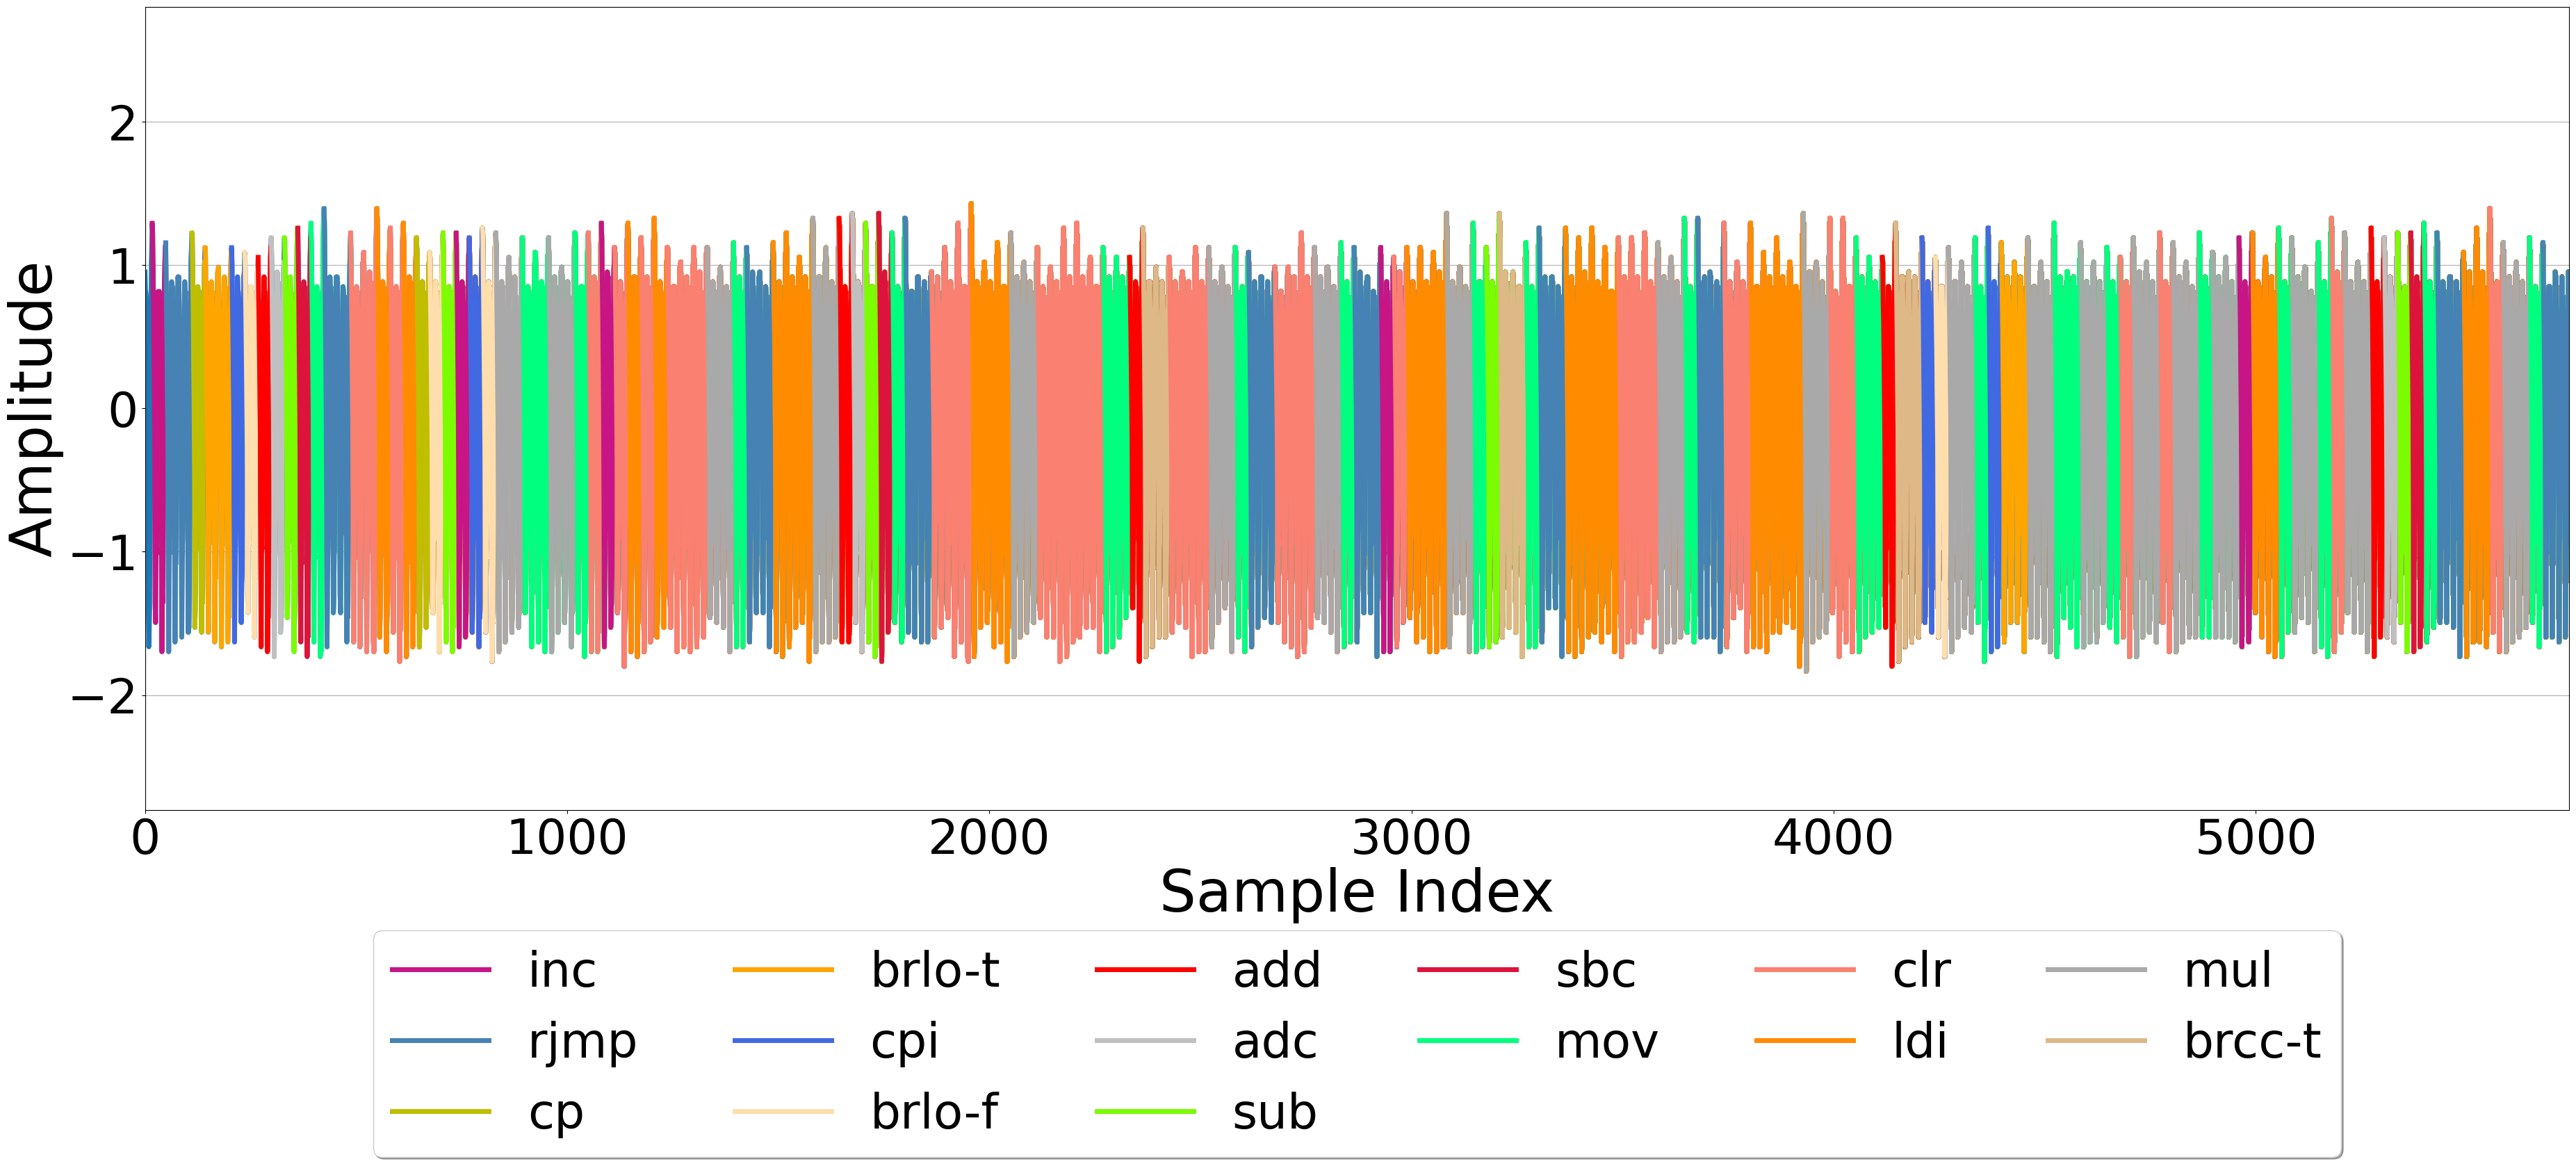

In [35]:
code = Train_Program_1_Code
Signal = Train_Program_1[0]

time_Signal = np.arange(Signal.shape[0])
plt.plot(time_Signal, Signal)
MapTool.mapCodeSignal(Signal, code, pad,skip_start_peaks=1)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(axis='y')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=6)
plt.xlim([0,len(Signal)])
plt.ylim(y_low,y_high)
plt.show()
plt.close()

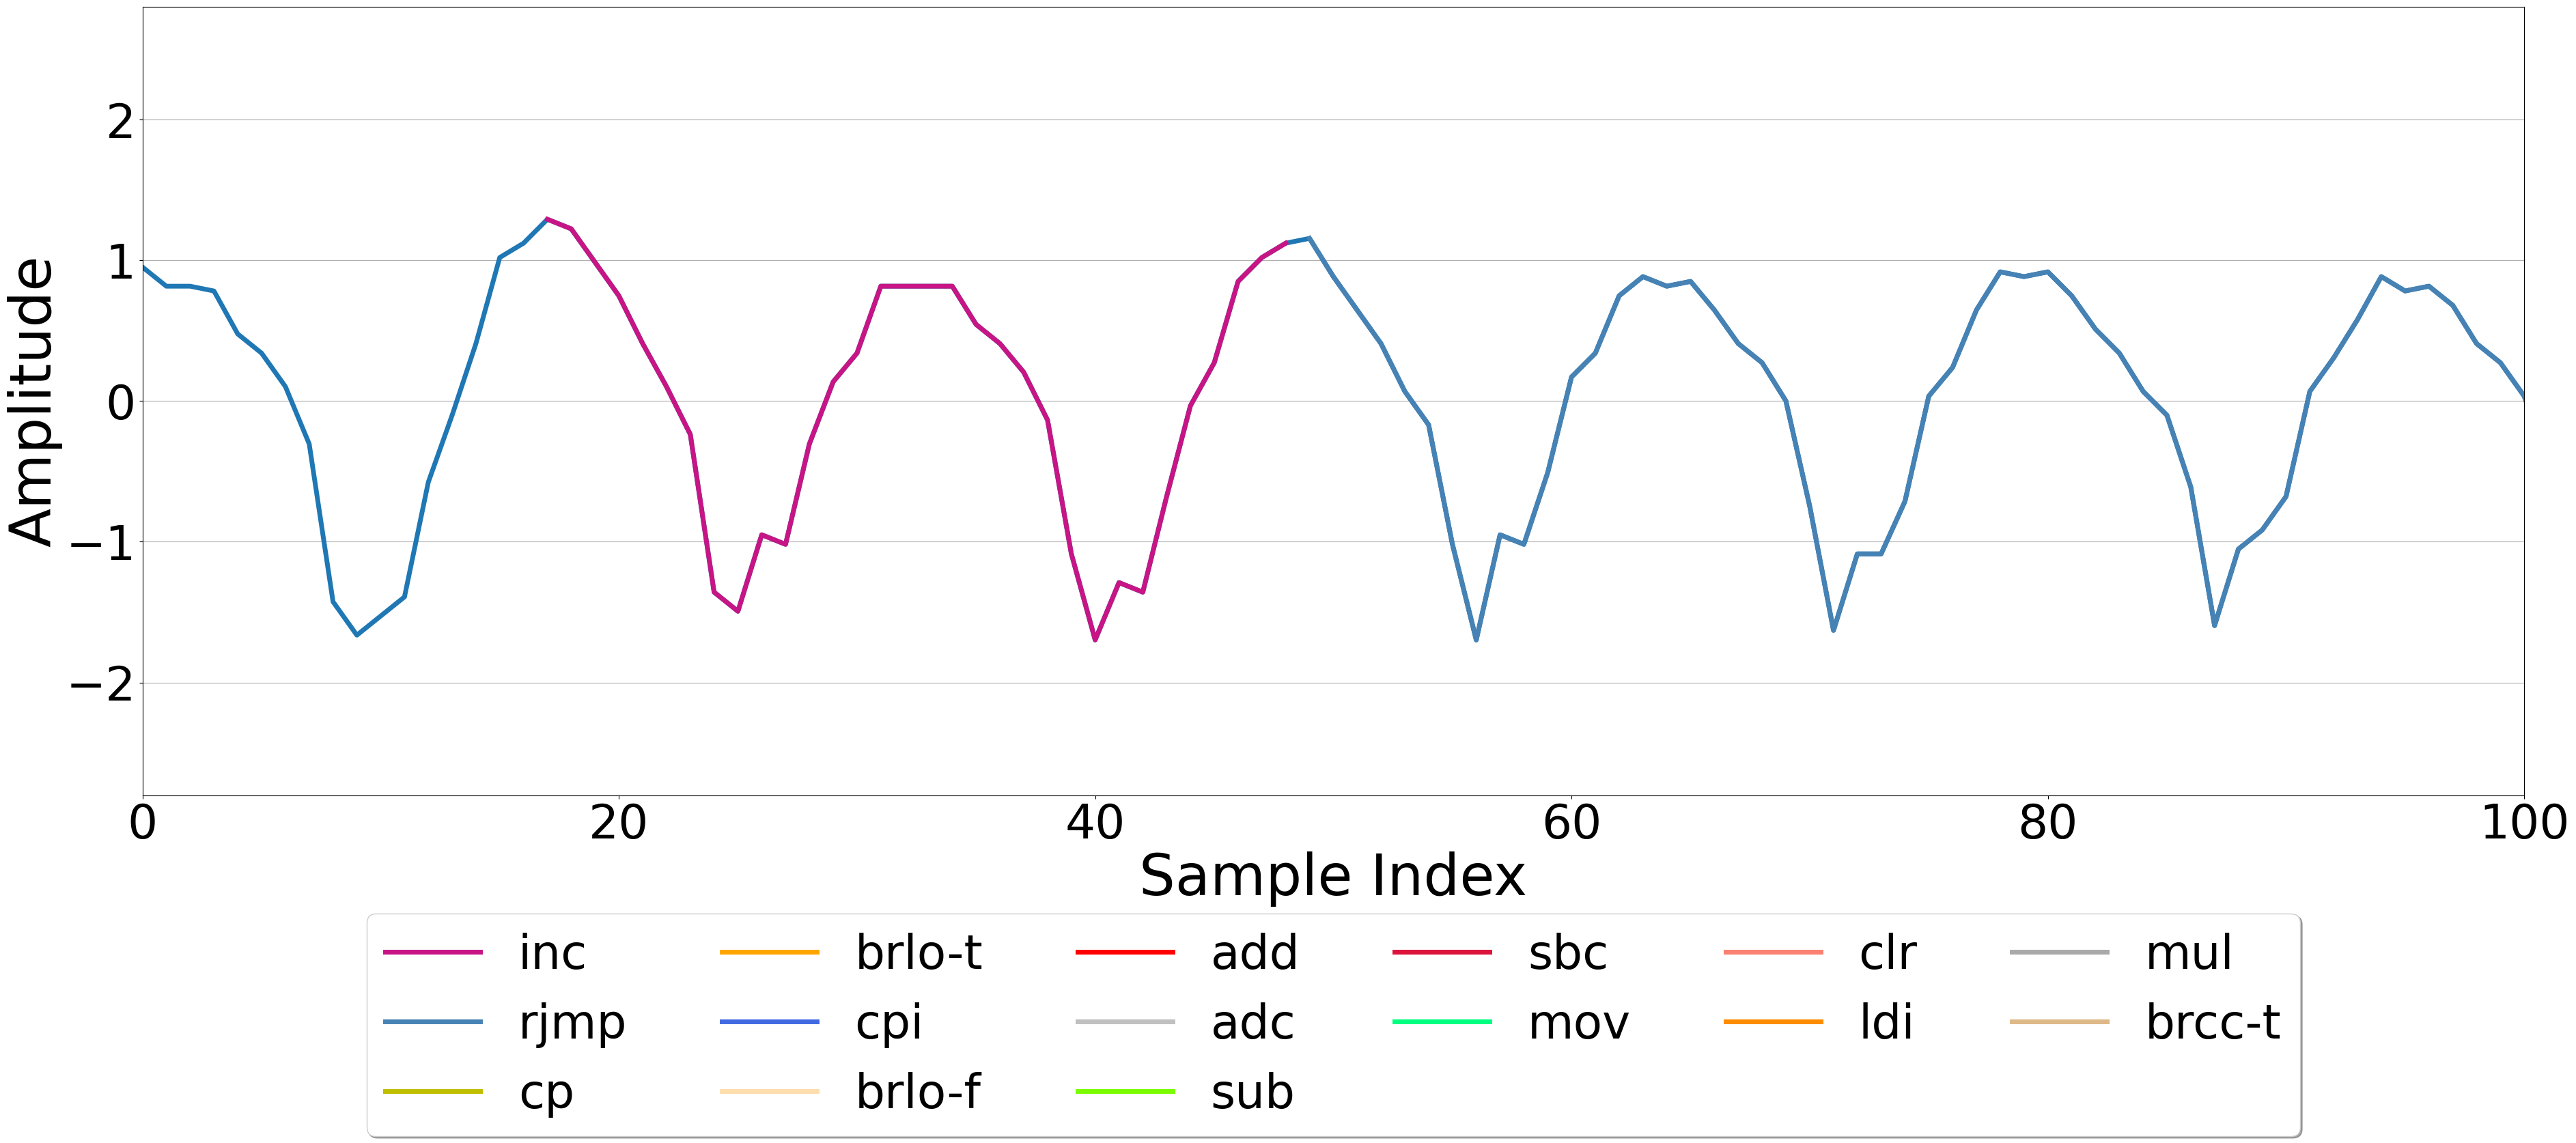

In [36]:
code = Train_Program_1_Code
Signal = Train_Program_1[0]

time_Signal = np.arange(Signal.shape[0])
plt.plot(time_Signal, Signal)
MapTool.mapCodeSignal(Signal, code, pad,skip_start_peaks=1)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(axis='y')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=6)
plt.xlim([0,100])
plt.ylim(y_low,y_high)
plt.show()
plt.close()

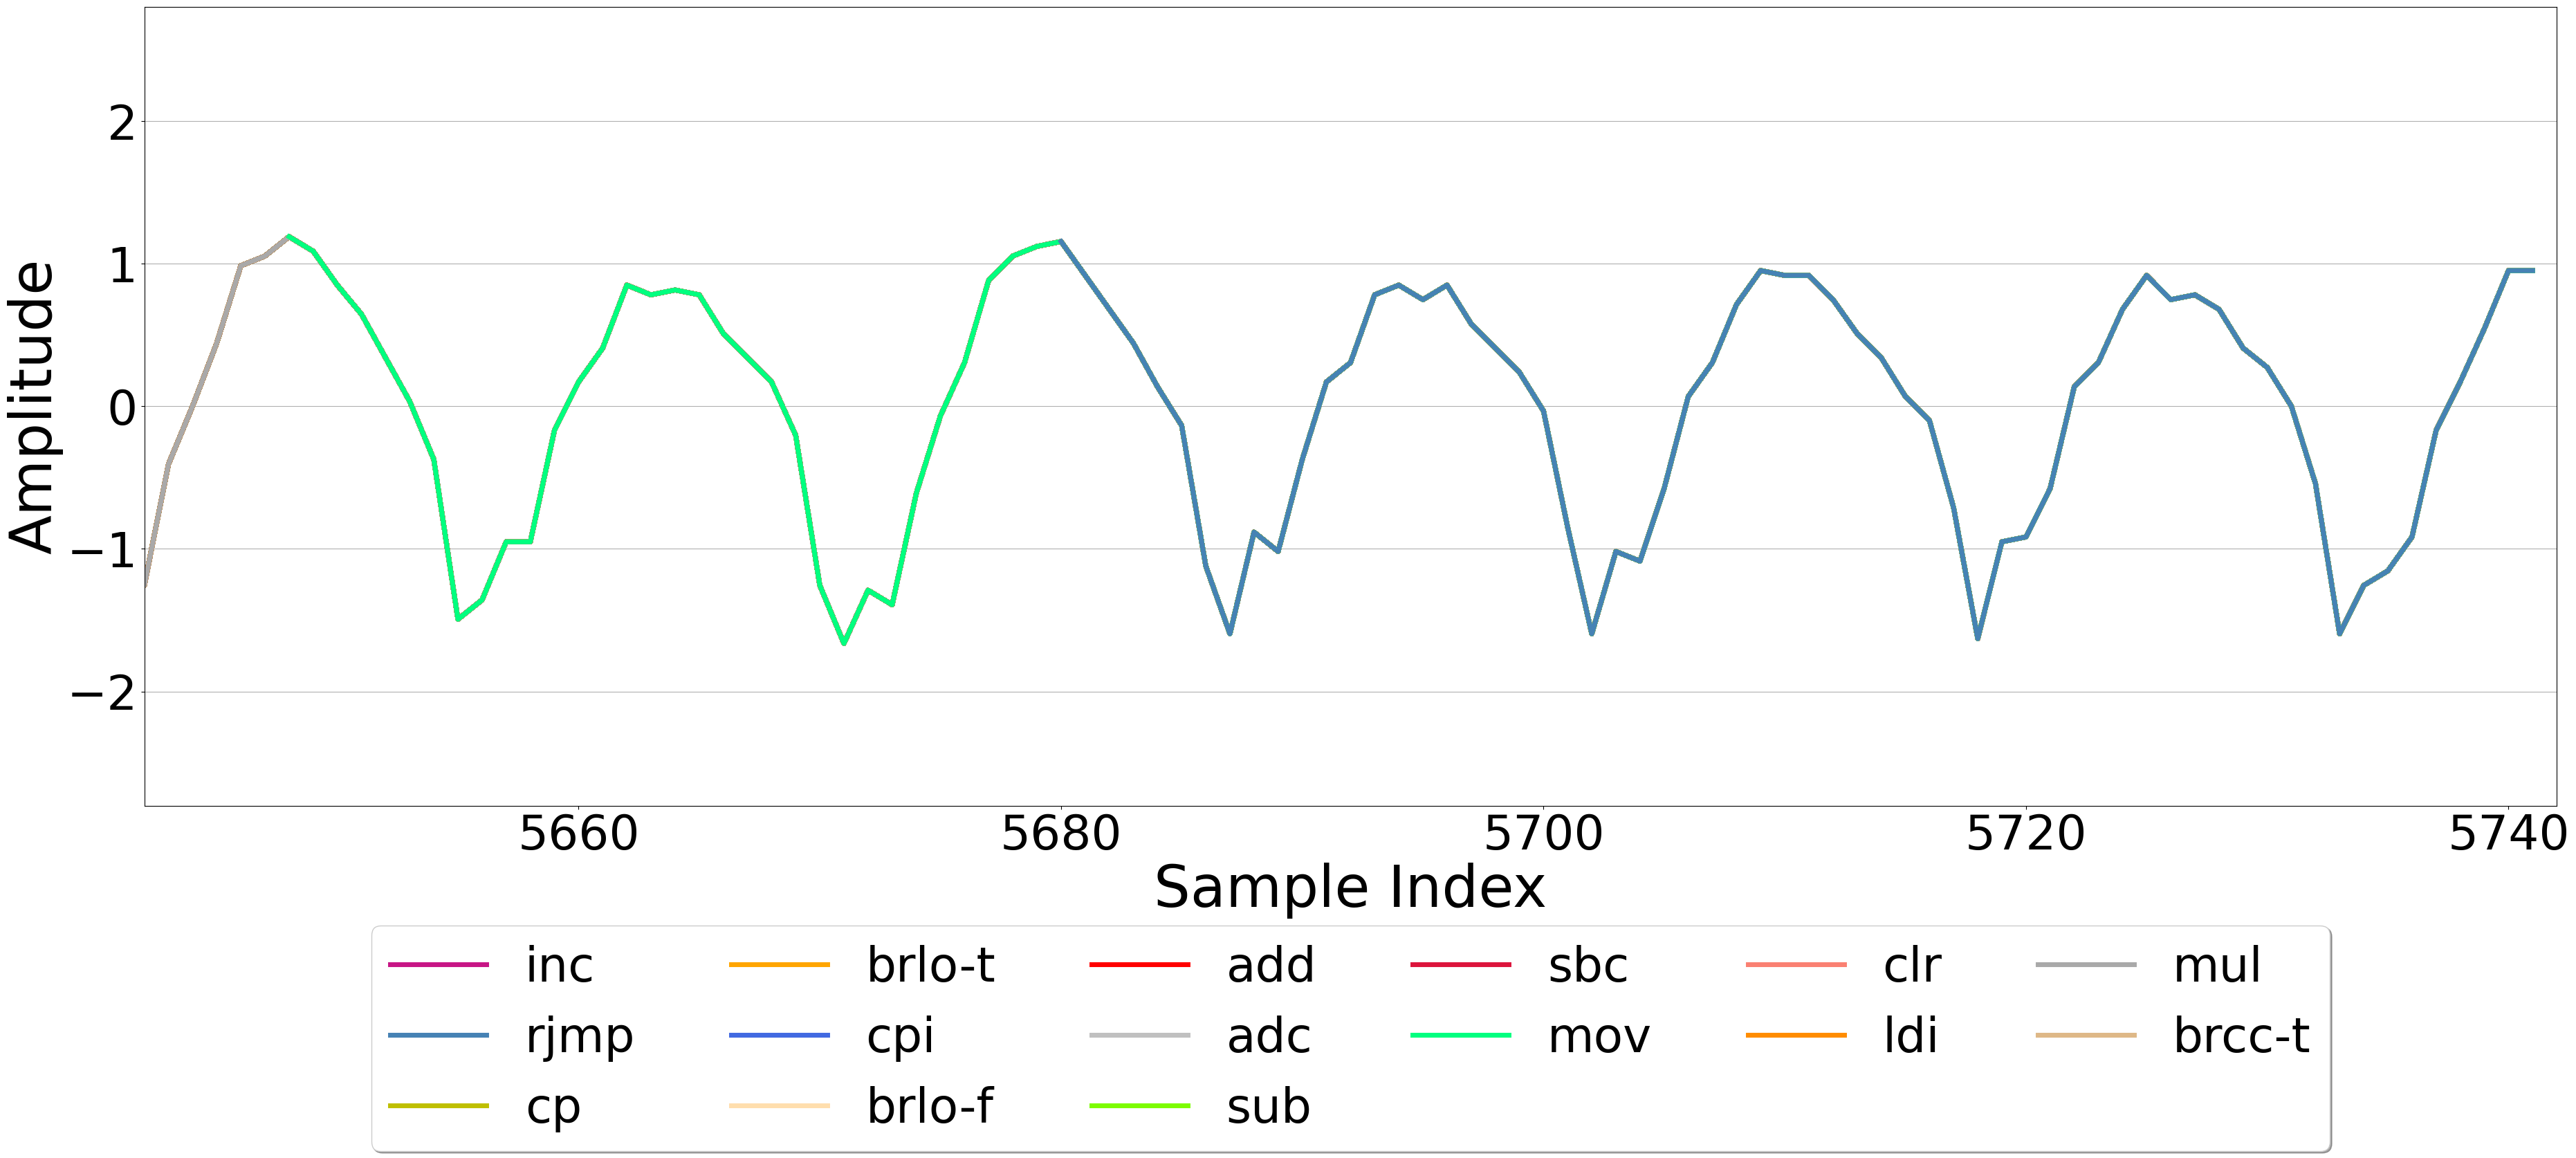

In [37]:
code = Train_Program_1_Code
Signal = Train_Program_1[0]

time_Signal = np.arange(Signal.shape[0])
plt.plot(time_Signal, Signal)
MapTool.mapCodeSignal(Signal, code, pad,skip_start_peaks=1)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(axis='y')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=6)
plt.xlim([len(Signal)-100,len(Signal)])
plt.ylim(y_low,y_high)
plt.show()
plt.close()

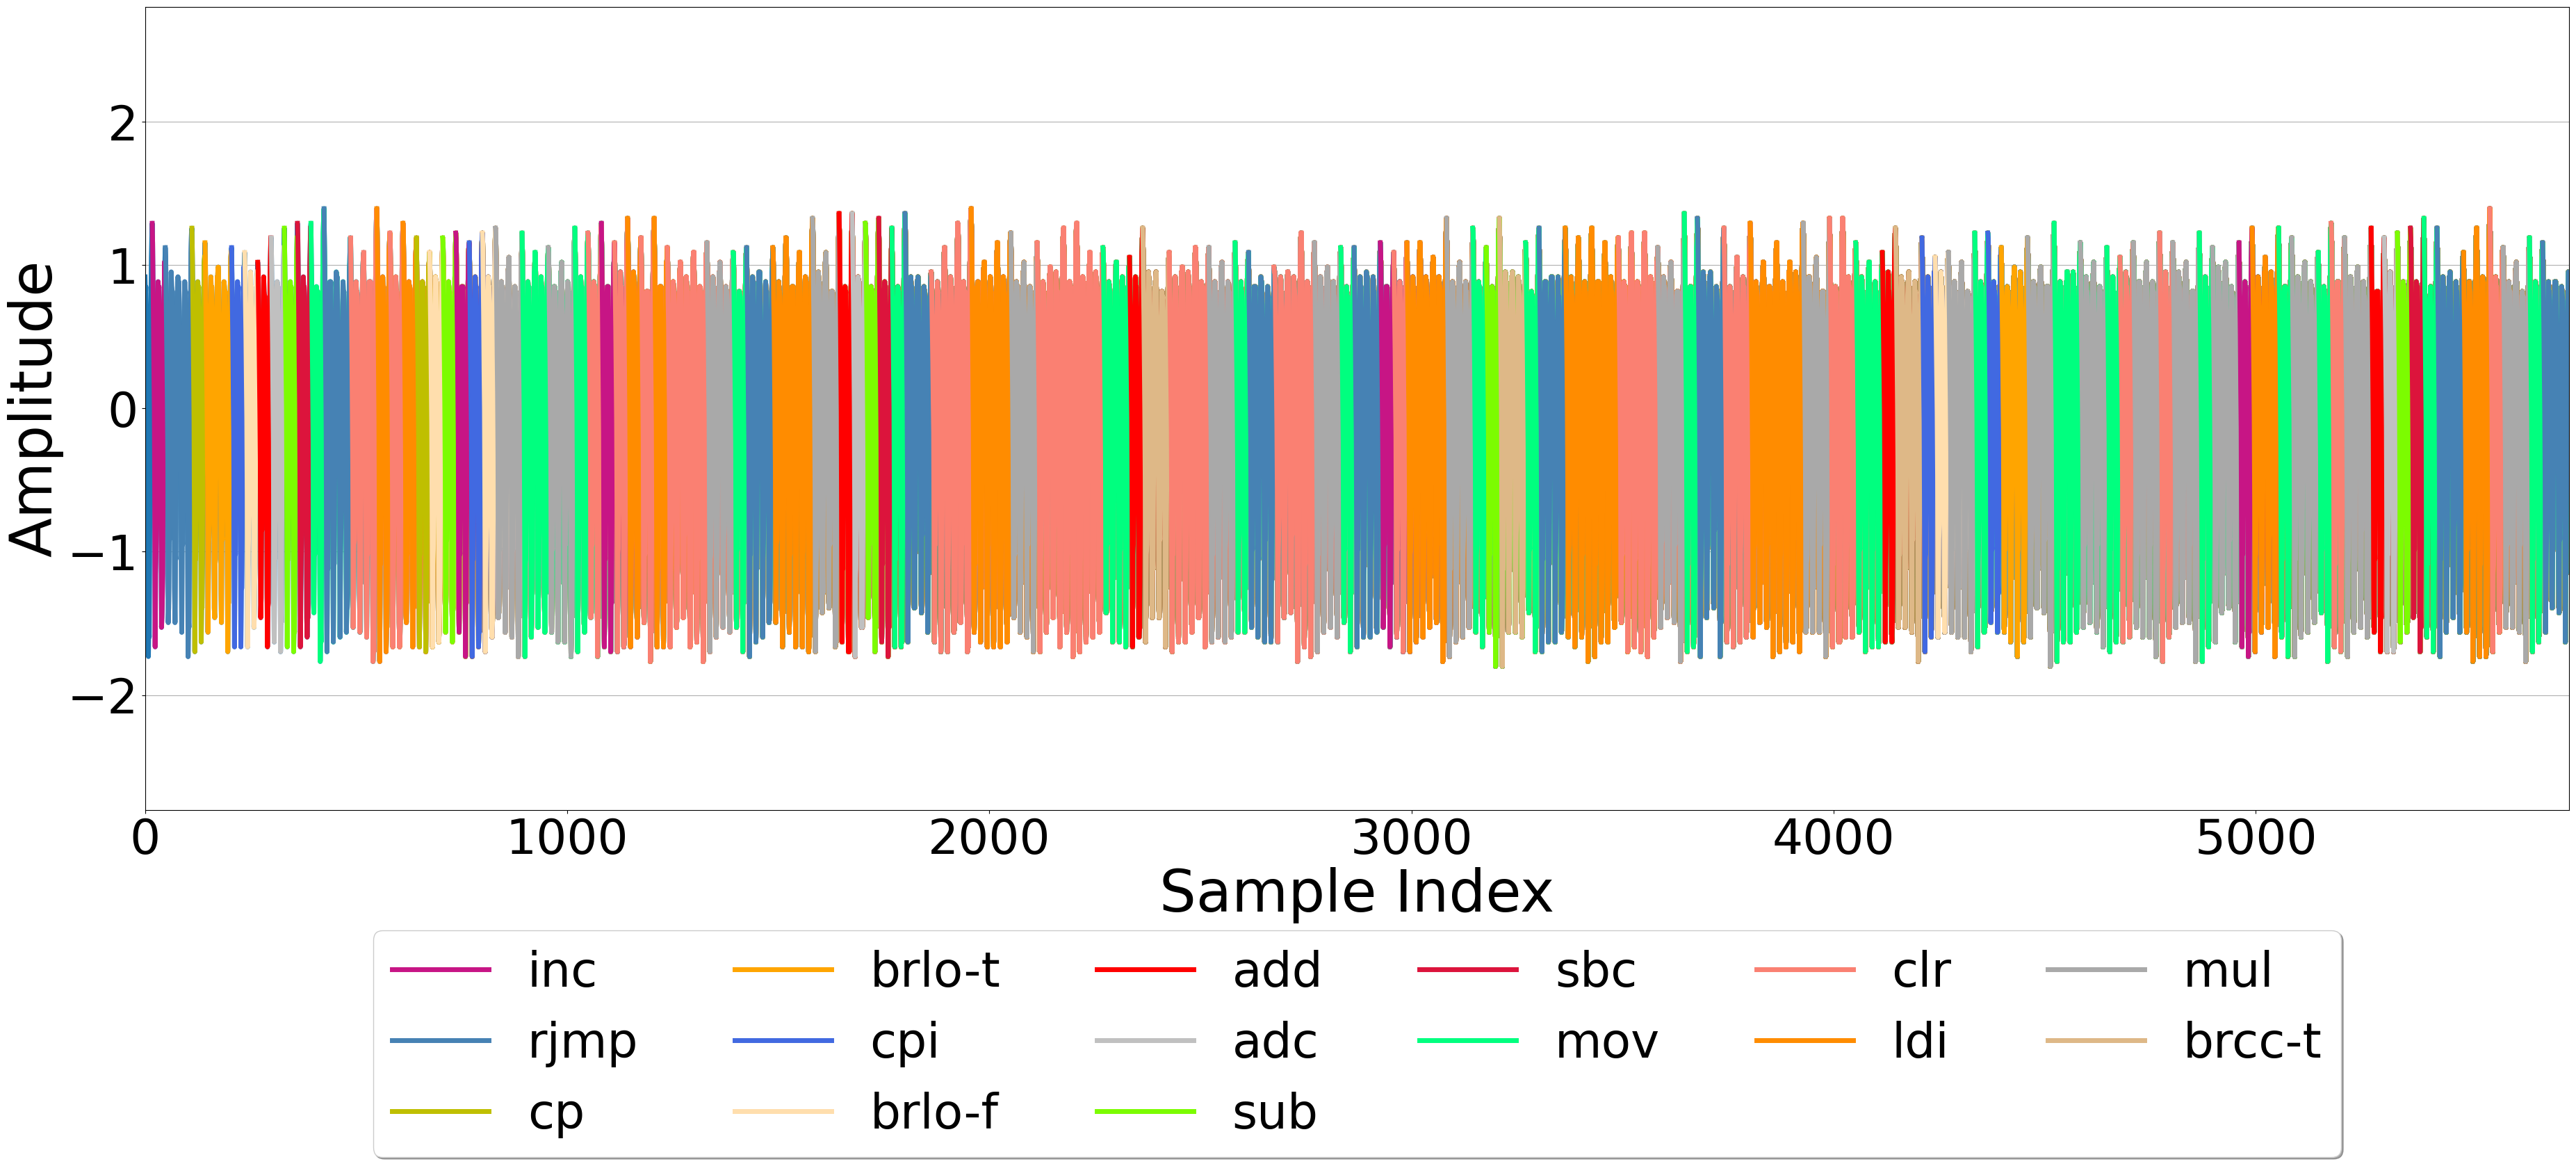

In [38]:
code = Train_Program_1_Code
Signal = Train_Program_1[2]

time_Signal = np.arange(Signal.shape[0])
plt.plot(time_Signal, Signal)
MapTool.mapCodeSignal(Signal, code, pad,skip_start_peaks=1)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(axis='y')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=6)
plt.xlim([0,len(Signal)])
plt.ylim(y_low,y_high)
plt.show()
plt.close()

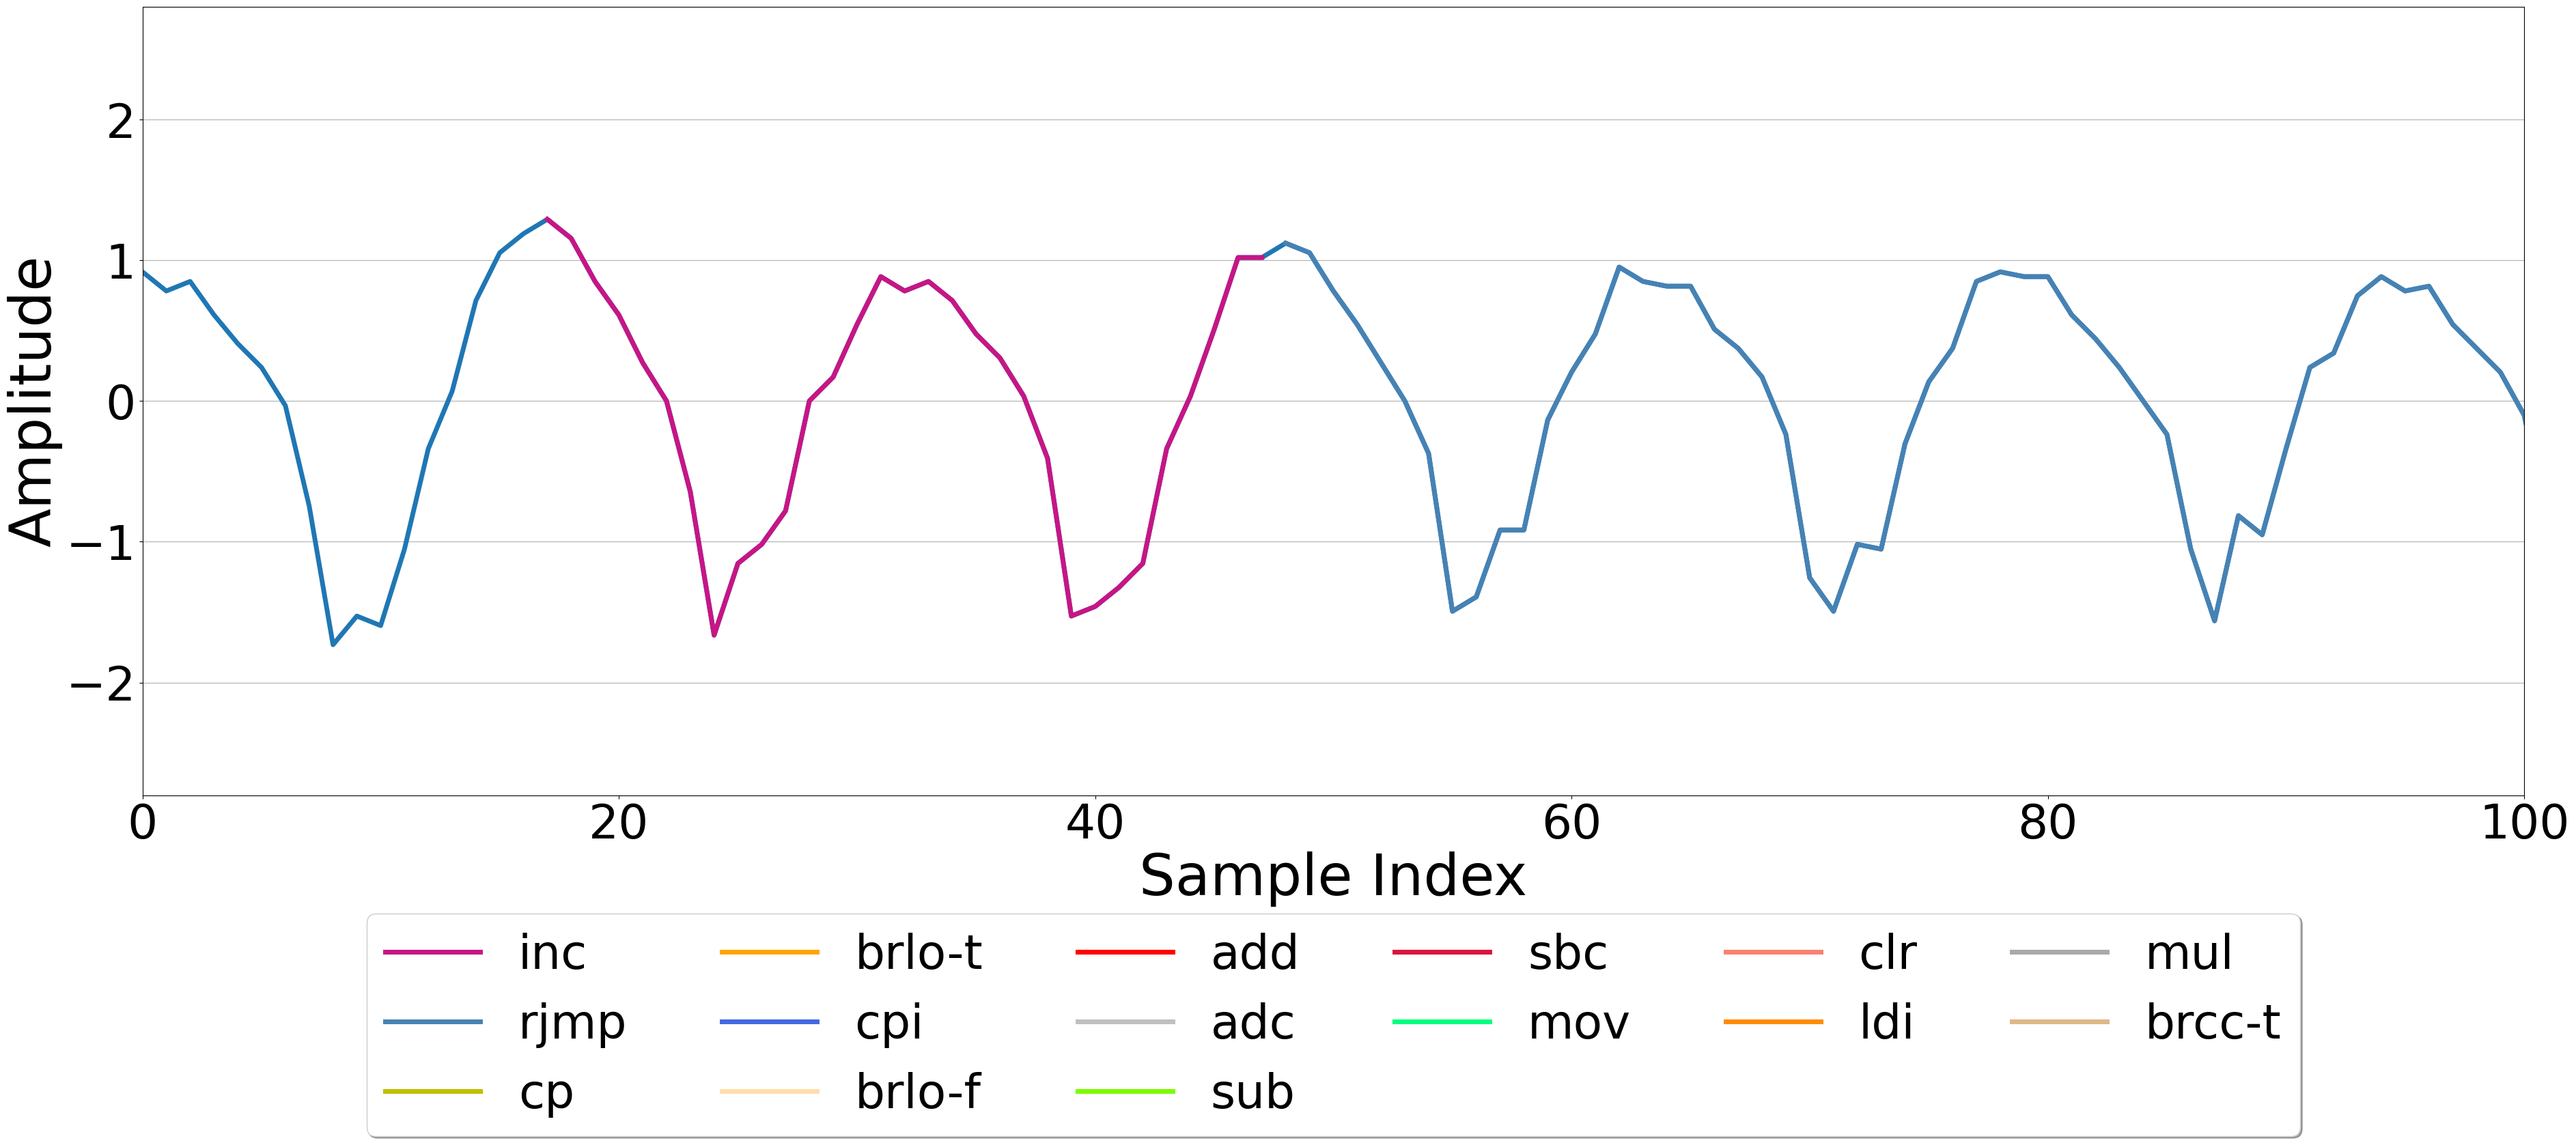

In [39]:
code = Train_Program_1_Code
Signal = Train_Program_1[2]

time_Signal = np.arange(Signal.shape[0])
plt.plot(time_Signal, Signal)
MapTool.mapCodeSignal(Signal, code, pad,skip_start_peaks=1)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(axis='y')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=6)
plt.xlim([0,100])
plt.ylim(y_low,y_high)
plt.show()
plt.close()

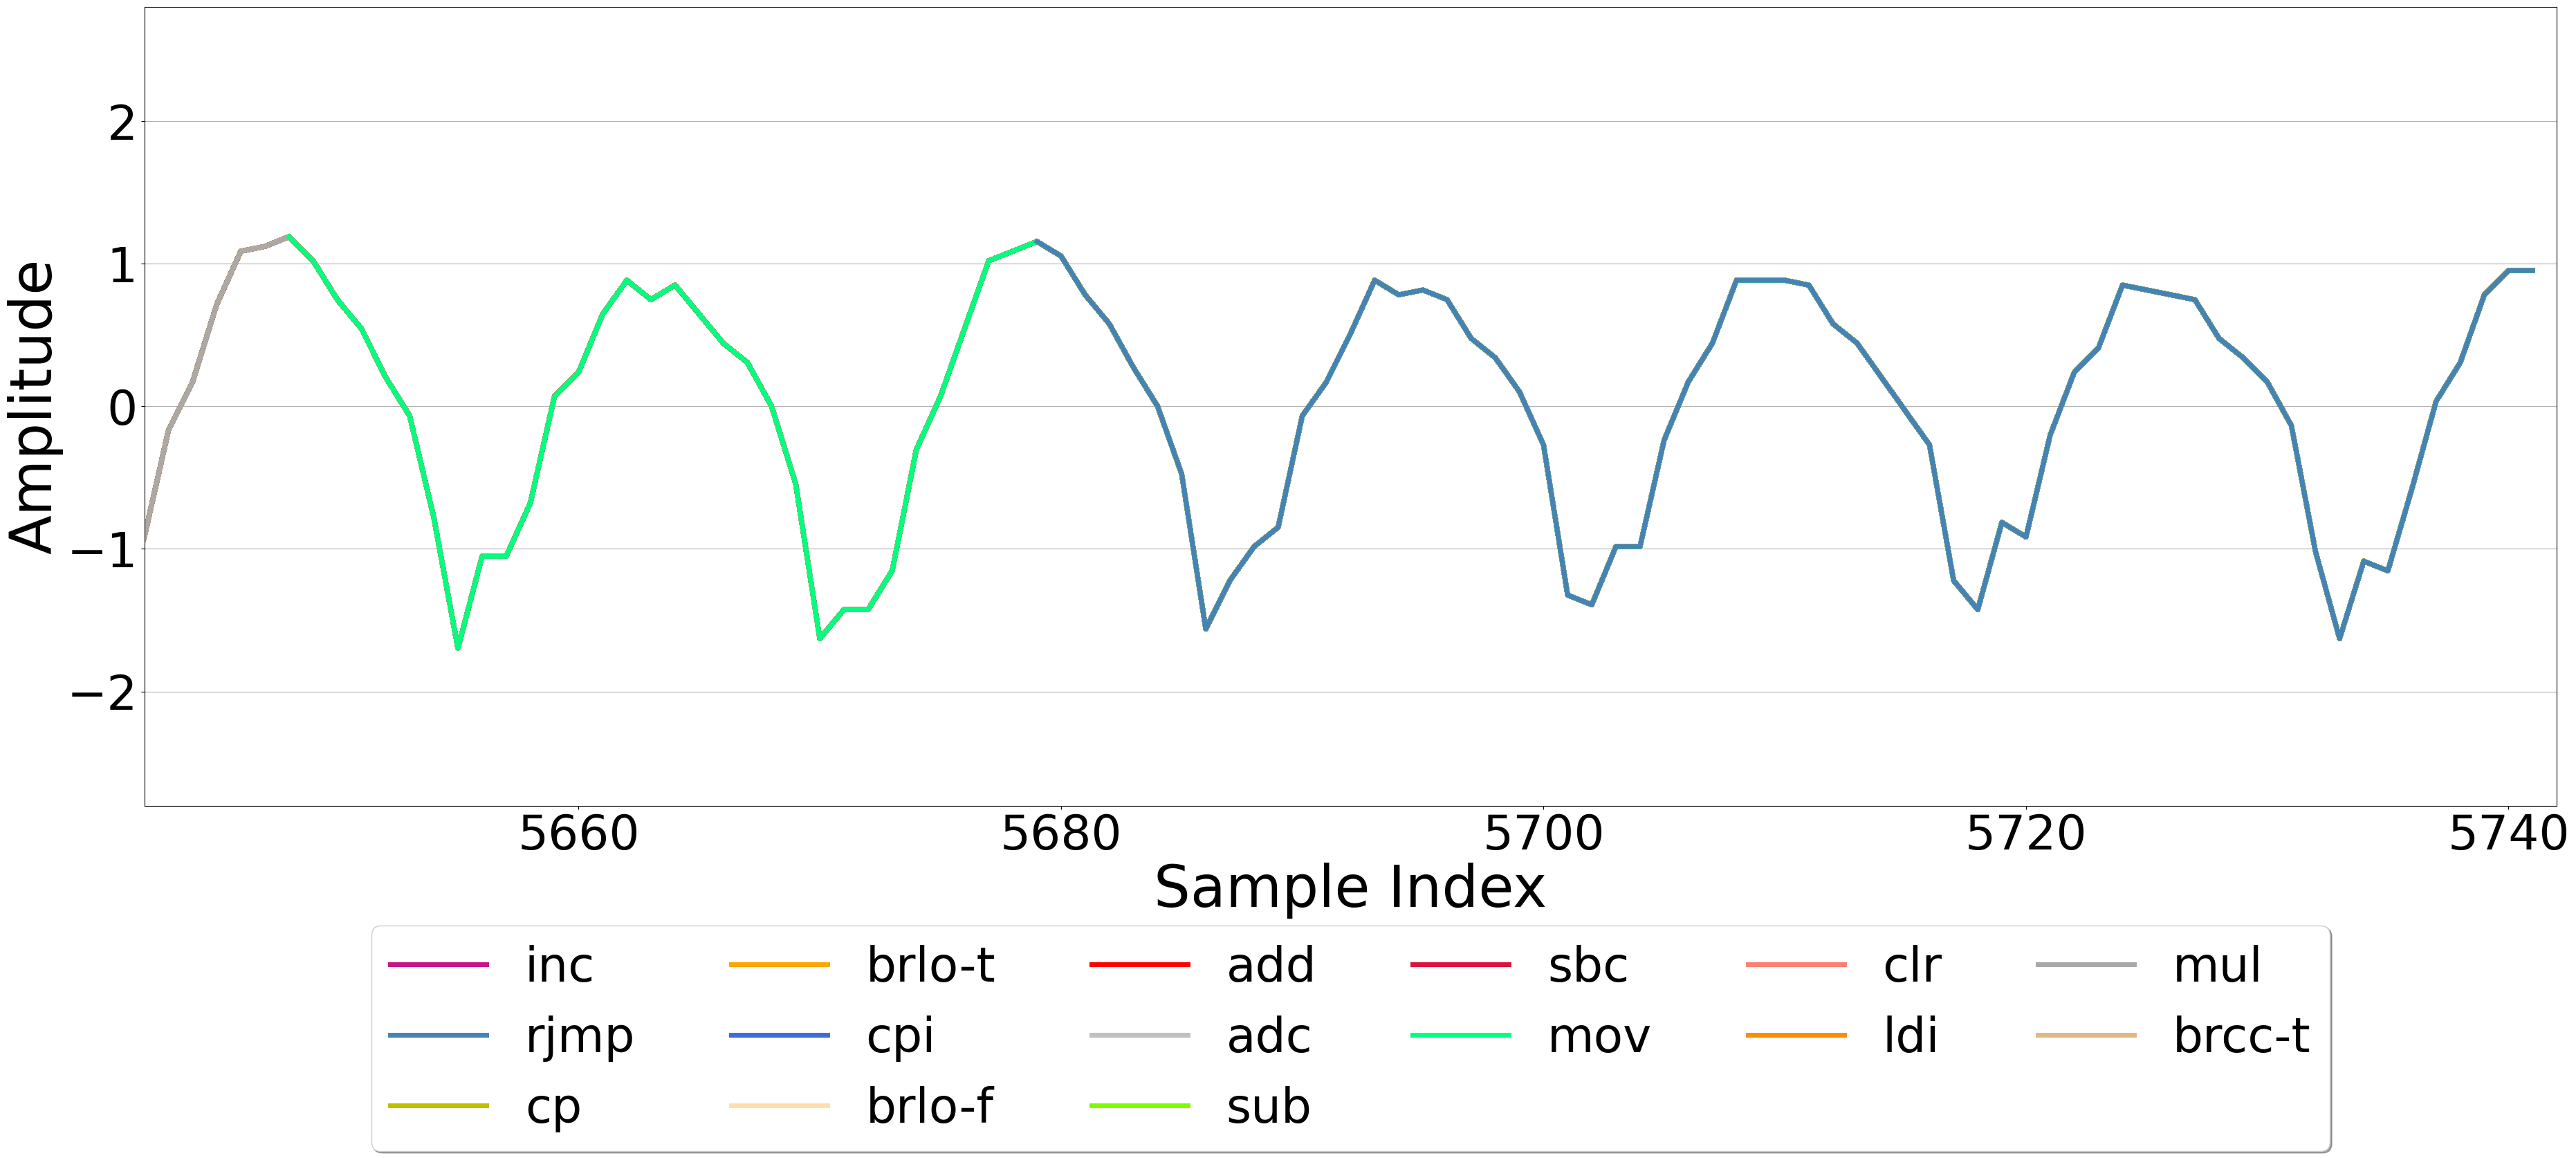

In [40]:
code = Train_Program_1_Code
Signal = Train_Program_1[2]

time_Signal = np.arange(Signal.shape[0])
plt.plot(time_Signal, Signal)
MapTool.mapCodeSignal(Signal, code, pad,skip_start_peaks=1)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(axis='y')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=6)
plt.xlim([len(Signal)-100,len(Signal)])
plt.ylim(y_low,y_high)
plt.show()
plt.close()

In [41]:
Peaks = MapTool.getPeaksDataset(Train_Program_1, pad)

Peaks_Amount = []
for peaks in Peaks:
    Peaks_Amount.append(len(peaks))
Peaks_Amount = np.array(Peaks_Amount)

print(np.unique(Peaks_Amount))

Peaks = MapTool.getPeaksDataset(Train_Program_2, pad)

Peaks_Amount = []
for peaks in Peaks:
    Peaks_Amount.append(len(peaks))
Peaks_Amount = np.array(Peaks_Amount)

print(np.unique(Peaks_Amount))

Peaks = MapTool.getPeaksDataset(Train_Program_3, pad)

Peaks_Amount = []
for peaks in Peaks:
    Peaks_Amount.append(len(peaks))
Peaks_Amount = np.array(Peaks_Amount)

print(np.unique(Peaks_Amount))

Peaks = MapTool.getPeaksDataset(Train_Program_4, pad)

Peaks_Amount = []
for peaks in Peaks:
    Peaks_Amount.append(len(peaks))
Peaks_Amount = np.array(Peaks_Amount)

print(np.unique(Peaks_Amount))

[368]
[394]
[350]
[272]


In [42]:
Peaks = MapTool.getPeaksDataset(Train_Program_1, pad, getHigh=False)

Peaks_Amount = []
for peaks in Peaks:
    Peaks_Amount.append(len(peaks))
Peaks_Amount = np.array(Peaks_Amount)

print(np.unique(Peaks_Amount))

Peaks = MapTool.getPeaksDataset(Train_Program_2, pad, getHigh=False)

Peaks_Amount = []
for peaks in Peaks:
    Peaks_Amount.append(len(peaks))
Peaks_Amount = np.array(Peaks_Amount)

print(np.unique(Peaks_Amount))

Peaks = MapTool.getPeaksDataset(Train_Program_3, pad, getHigh=False)

Peaks_Amount = []
for peaks in Peaks:
    Peaks_Amount.append(len(peaks))
Peaks_Amount = np.array(Peaks_Amount)

print(np.unique(Peaks_Amount))

Peaks = MapTool.getPeaksDataset(Train_Program_4, pad, getHigh=False)

Peaks_Amount = []
for peaks in Peaks:
    Peaks_Amount.append(len(peaks))
Peaks_Amount = np.array(Peaks_Amount)

print(np.unique(Peaks_Amount))

[367]
[393]
[349]
[271]


### The following discects the signals into ones that only contain only information about the program instructions
- i.e. start of the first instruction at 0 amplitude to the high point all the way to the end of hte final instruction cycle to 0.

In [43]:
'''
Removes the starting and end instruction infromation as these are not appart of the program under examination.
'''
def removeStartEndInstructionInfo(signal):
    stop = 0
    first_check = 0
    new_signal = signal.copy()
    
    # Since the signals start at a high peak, we need to remove to 0 and then up to when it hits 0 again.
    while stop == 0:
        if first_check == 0:
            # if above 0 remove information
            if new_signal[0] > 0:
                new_signal = new_signal[1:]
            # if below 0 remove information and a few more and set first_check to start check for below 0 amplitude.
            else: 
                new_signal = new_signal[3:]
                first_check = 1
        else:
            if new_signal[0] < 0:
                new_signal = new_signal[1:]
            else:
                stop = 1
    # next need to remove the end of the signal information of the next instruction.
    stop = 0
    while stop == 0:
        if new_signal[len(new_signal)-1] > 0:
            new_signal = new_signal[:len(new_signal)-1]
        else:
            stop = 1
            
    return new_signal
            

In [44]:
'''
Obtains a set amount of signals for comparing and performing anomaly detection later. 
Additionally, remove additional information such as the starting peak and the final peak.

input:
    dataset: numpy list of signals.
    amount: number of signals to keep.
    
output:
    new_dataset: numpy list of signals without other information
'''
def getOnlyProgram(dataset, amount):
    
    new_dataset = []
    for i in range(amount):
        signal = dataset[i]
        signal = removeStartEndInstructionInfo(signal)
        new_dataset.append(signal)
    
    return np.array(new_dataset, dtype=object)

In [46]:
Train_Program_1_Complete = getOnlyProgram(Train_Program_1, 2500)
Train_Program_2_Complete = getOnlyProgram(Train_Program_2, 2500)
Train_Program_3_Complete = getOnlyProgram(Train_Program_3, 2500)
Train_Program_4_Complete = getOnlyProgram(Train_Program_4, 2500)

In [47]:
Train_Program_4_Complete.shape

(2500,)

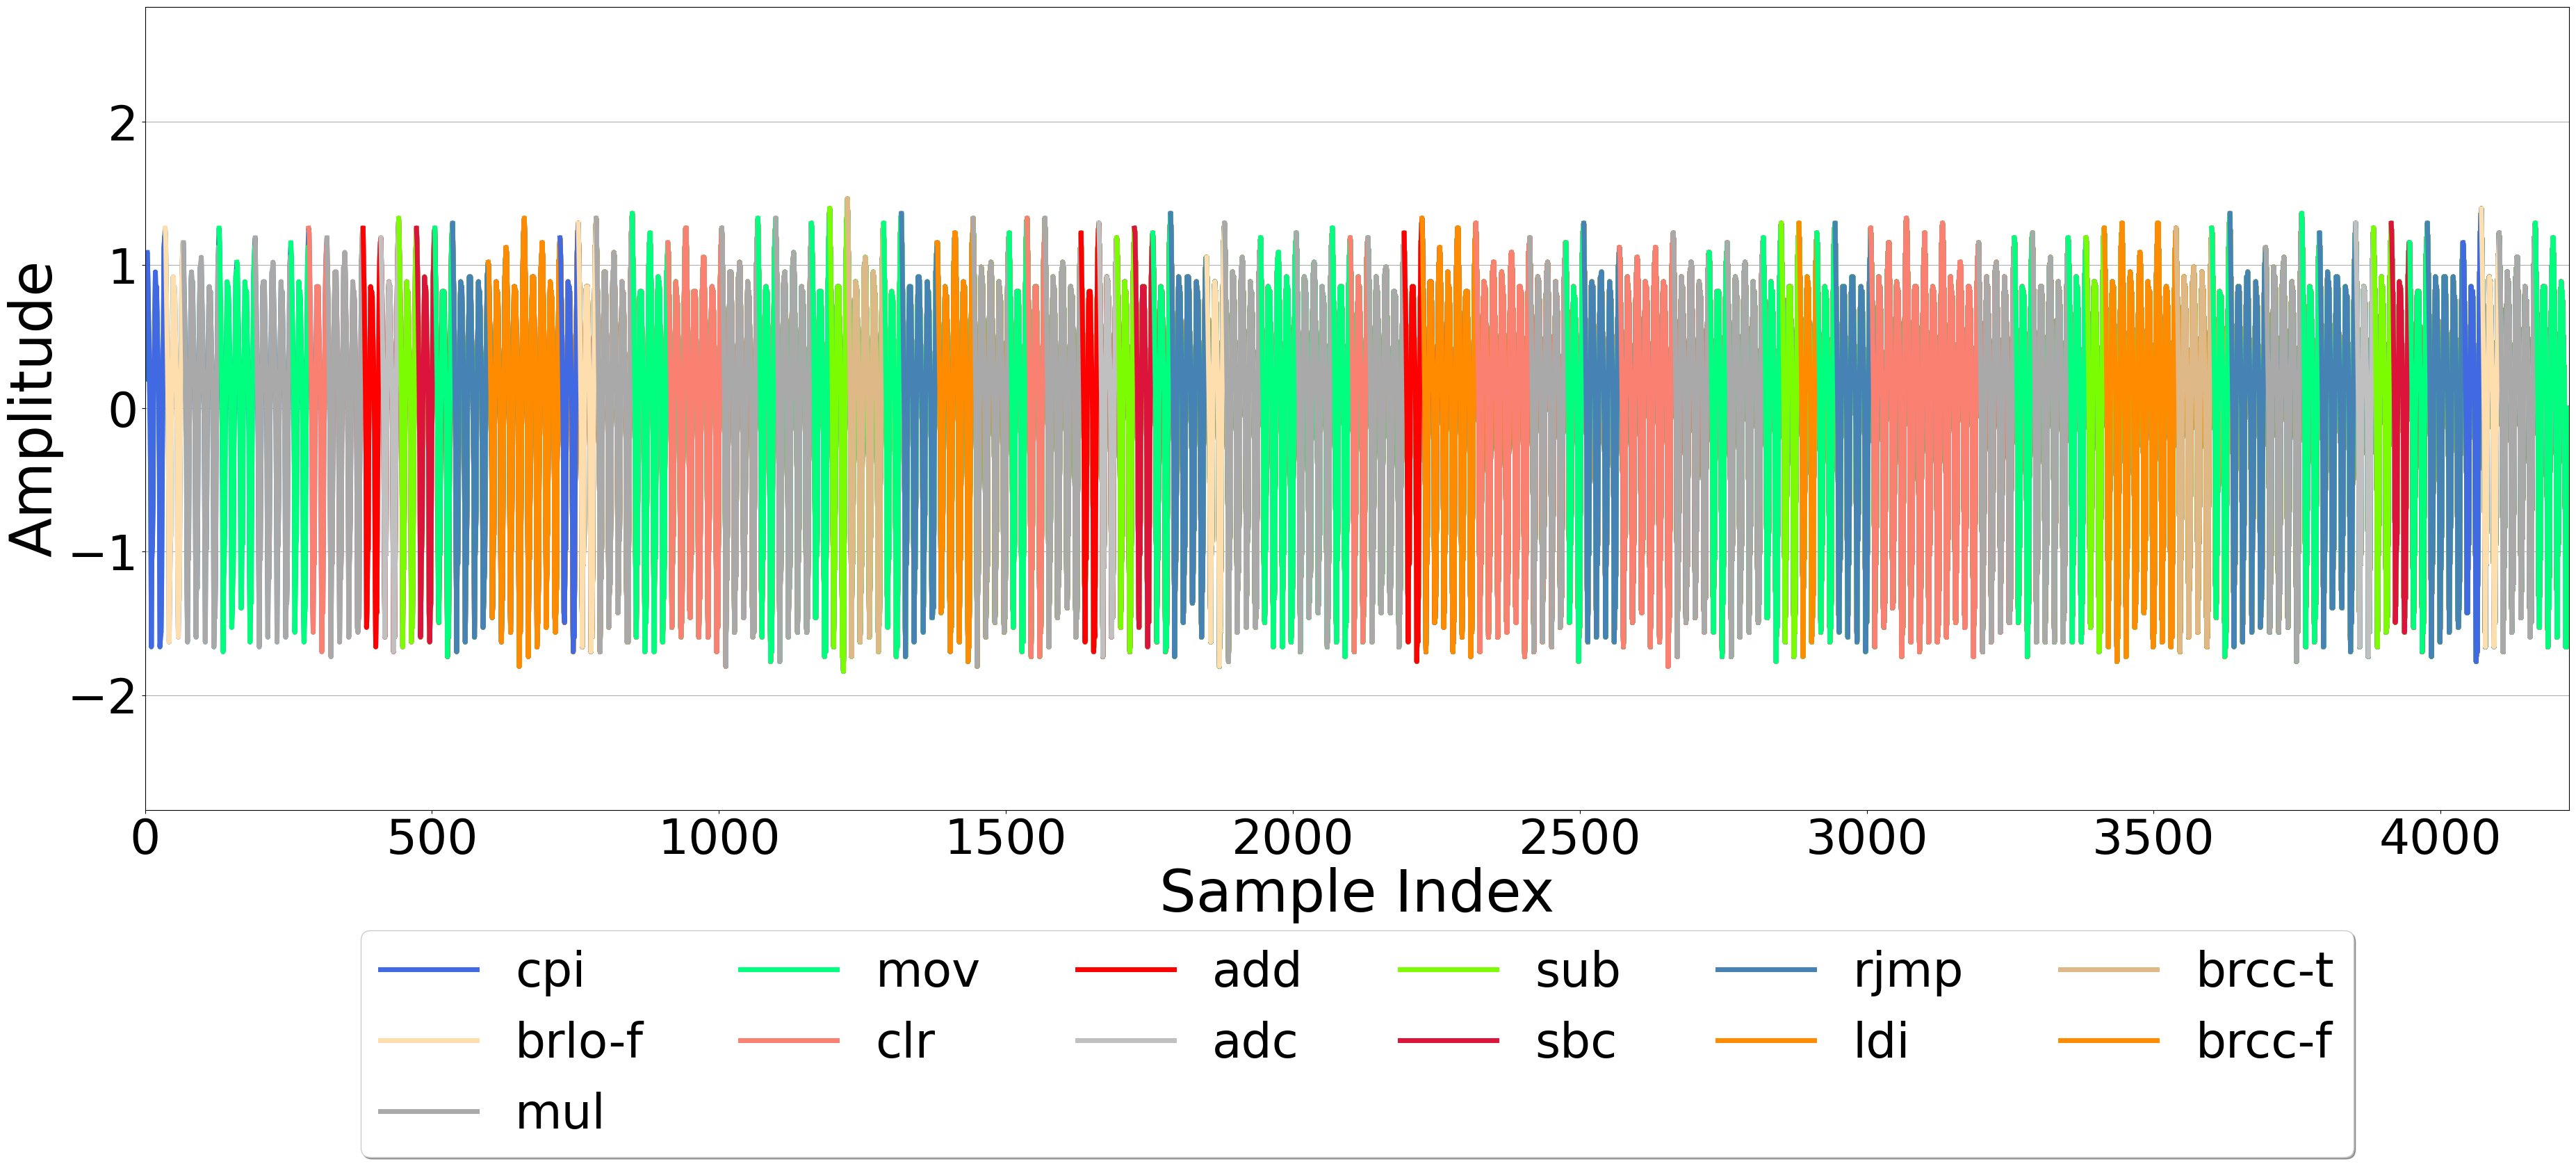

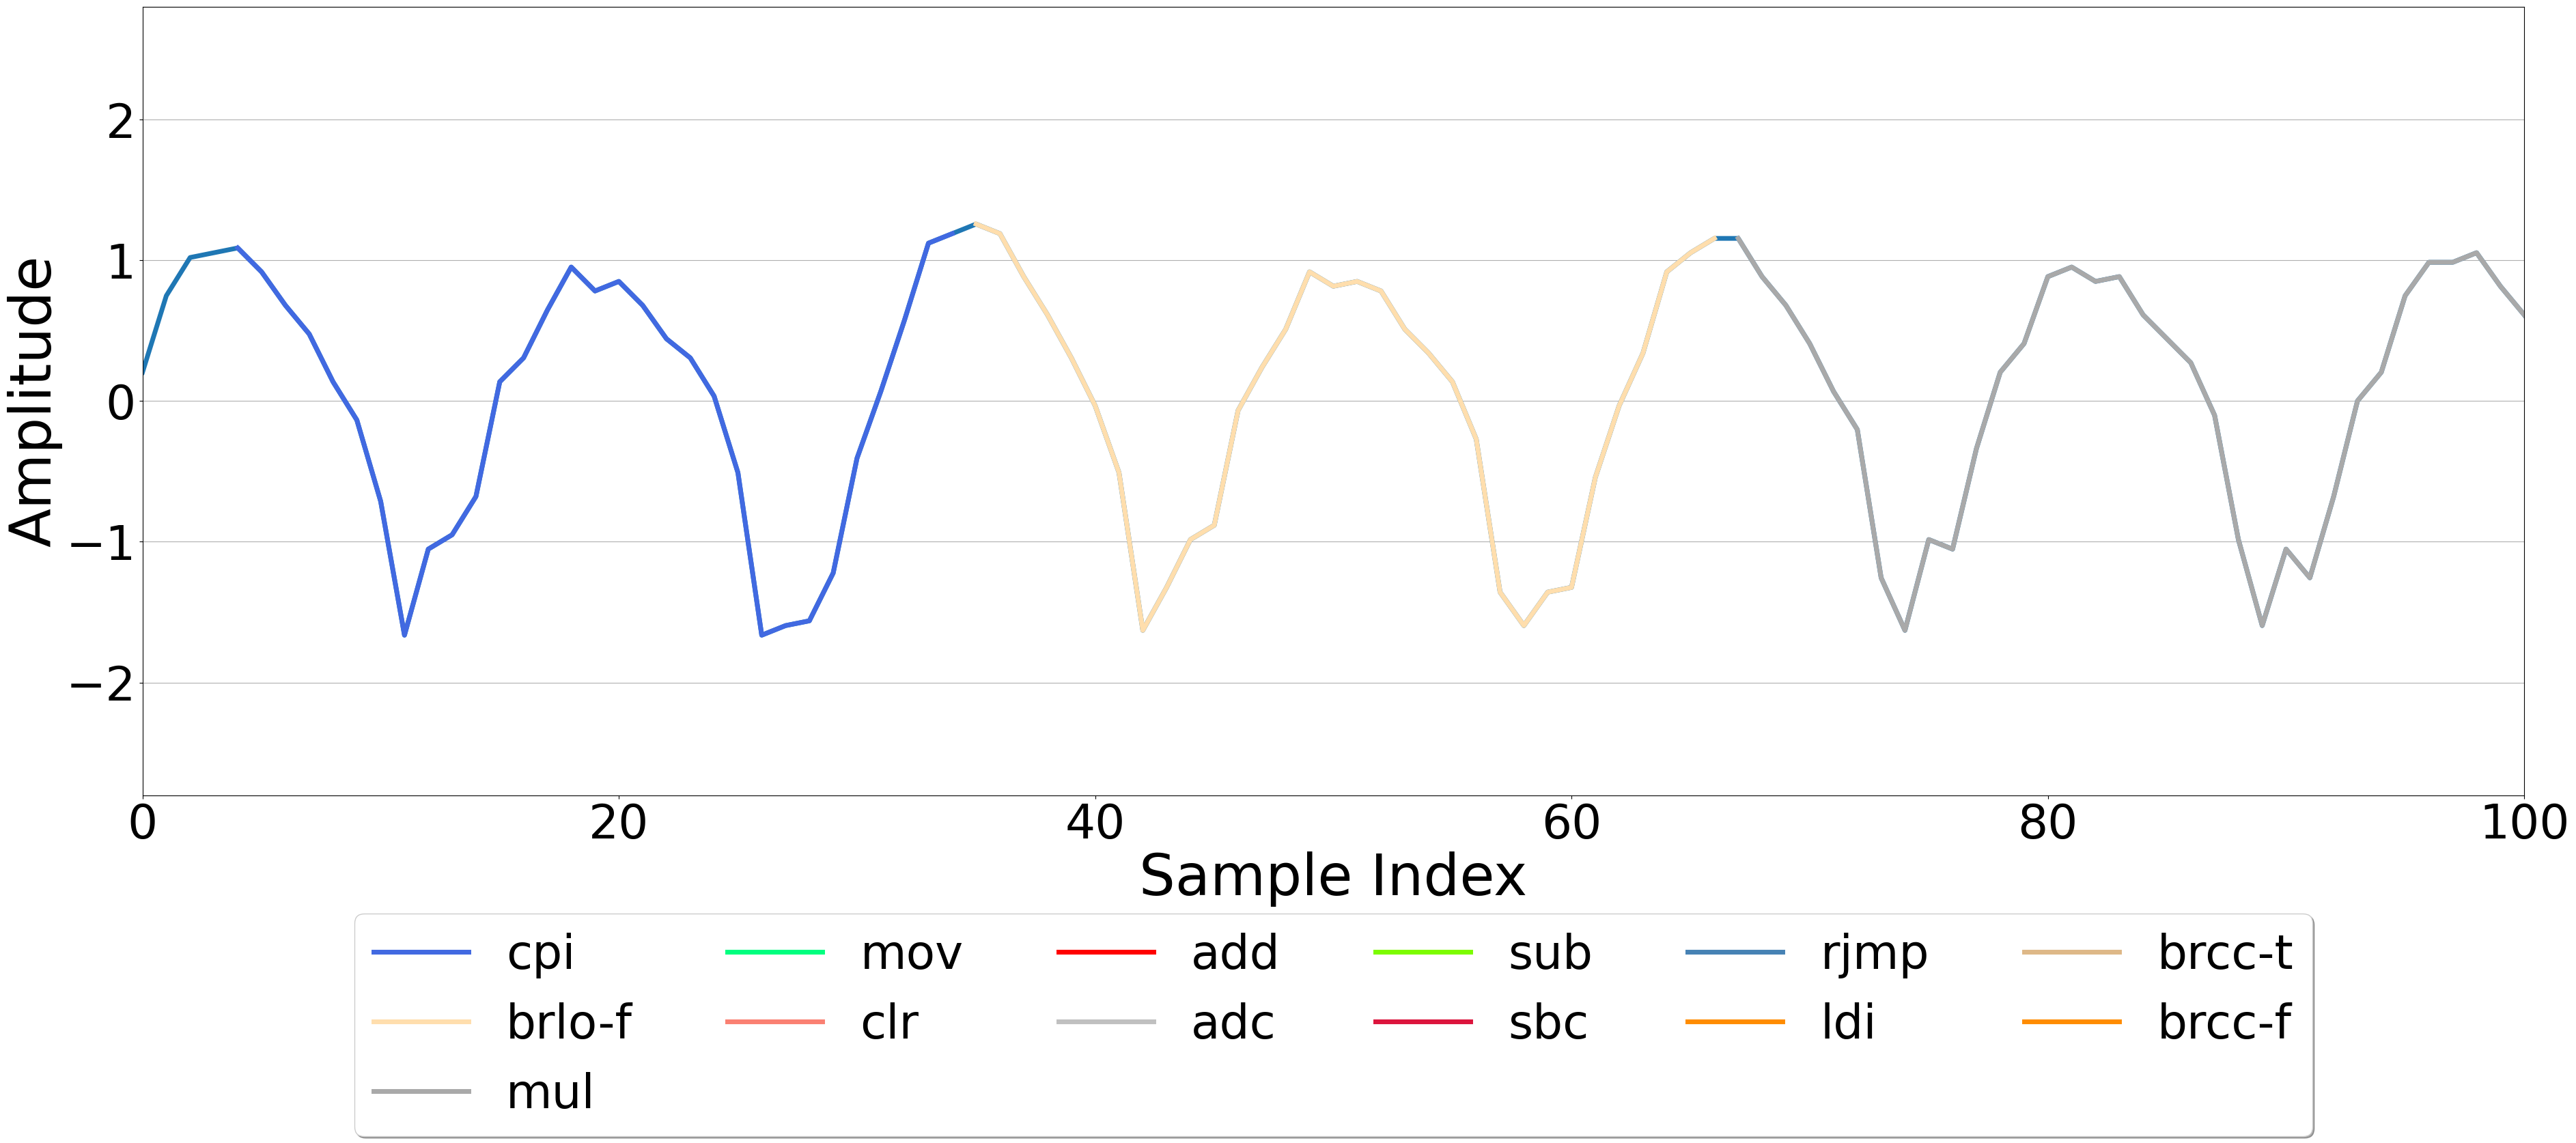

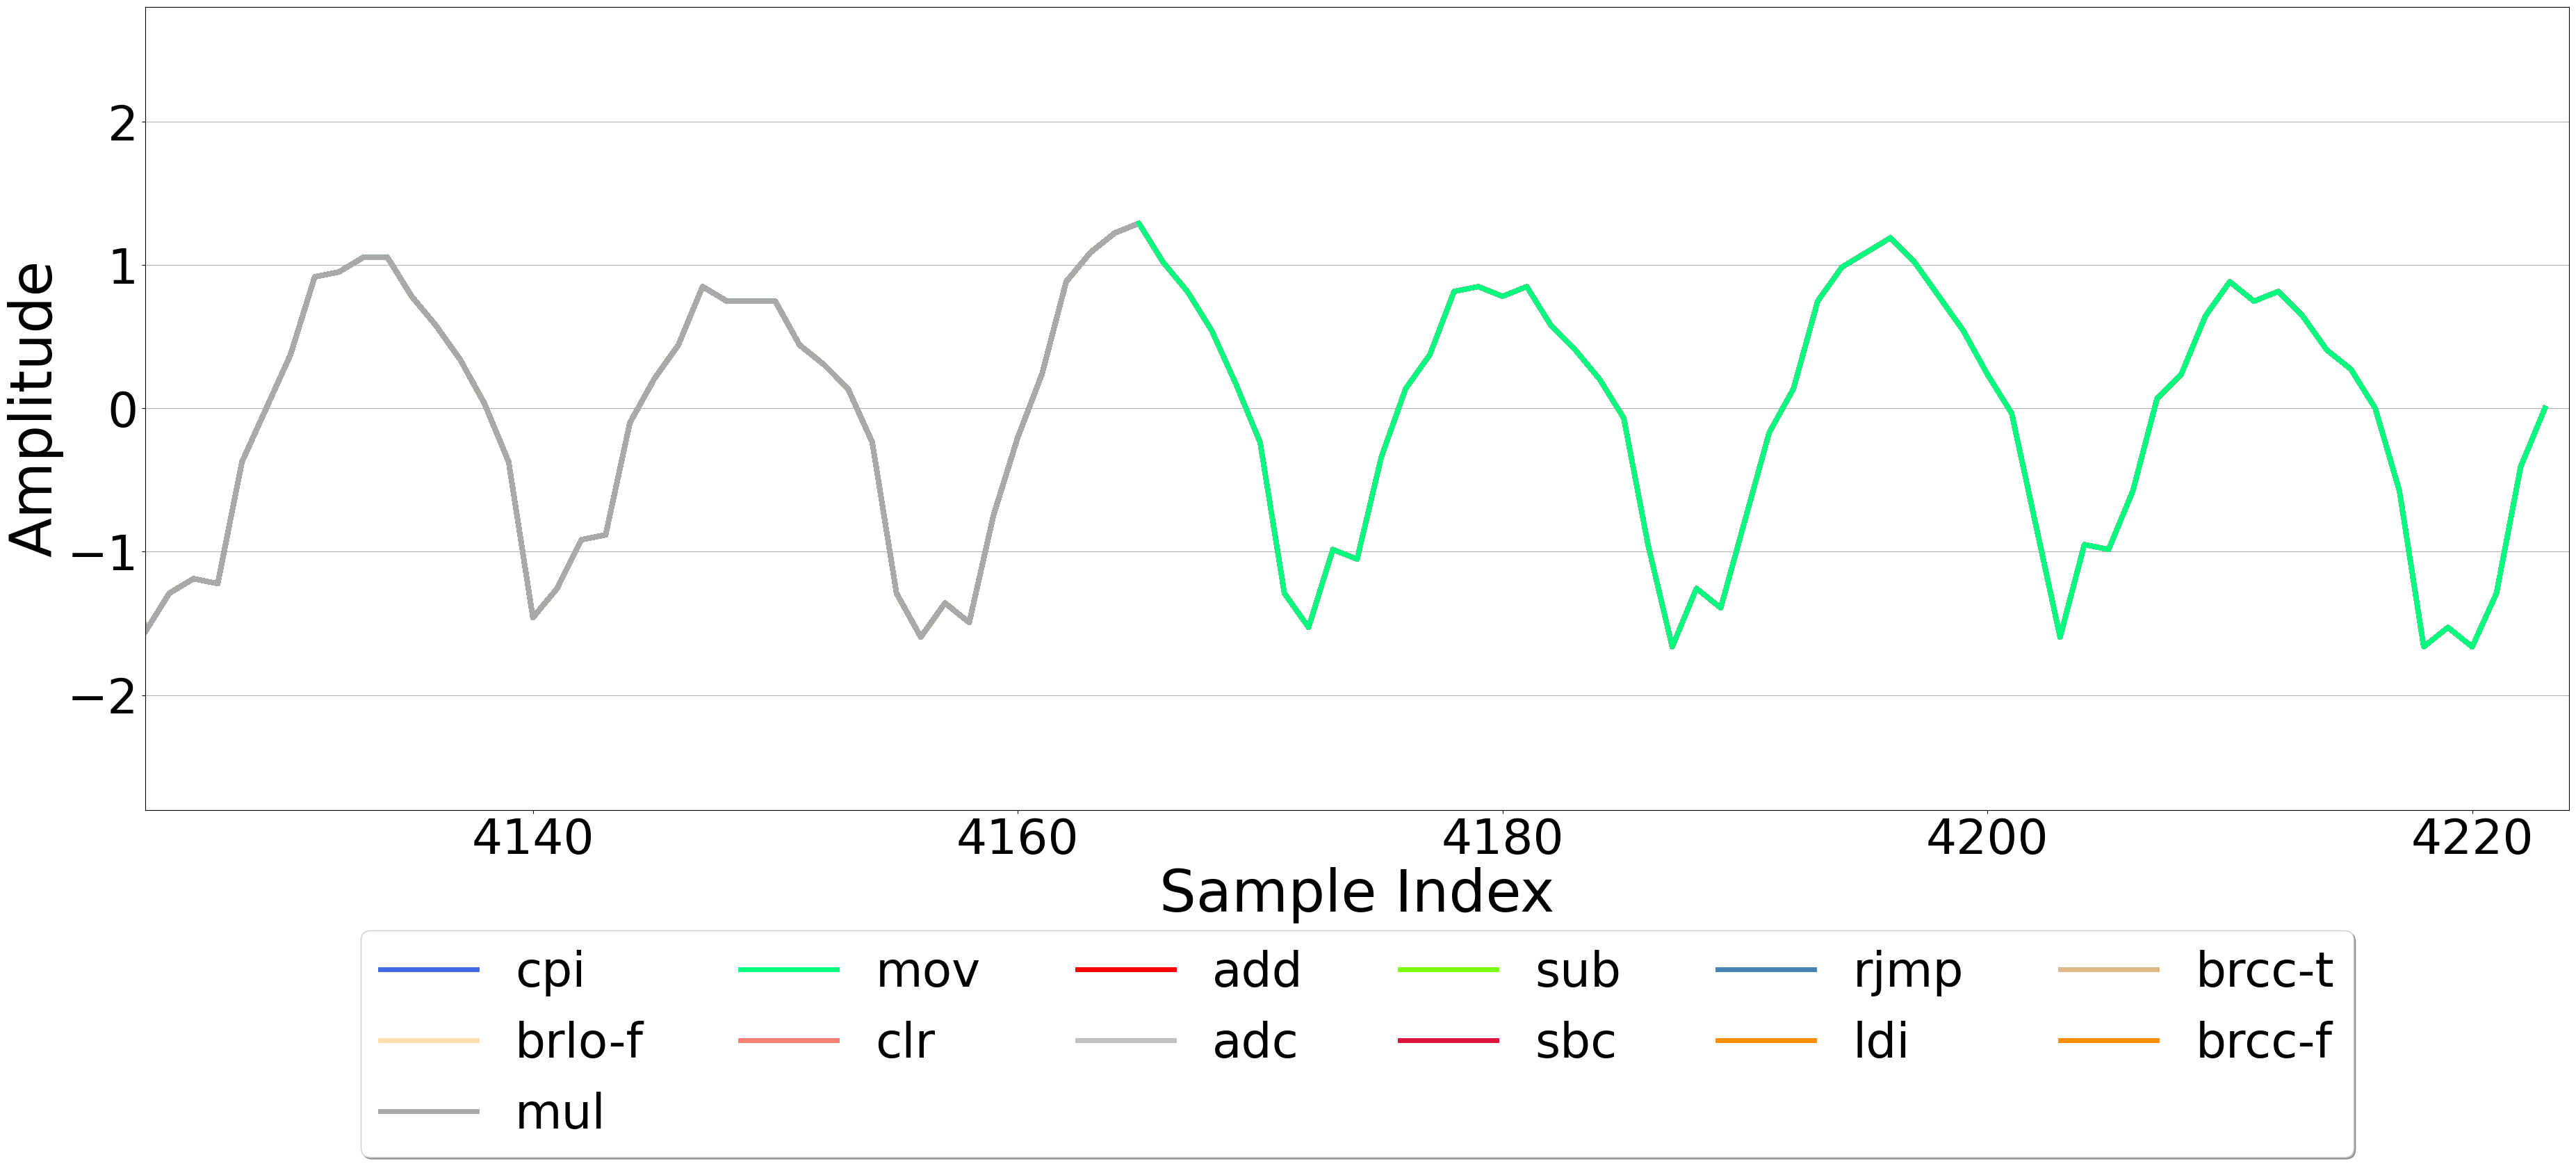

In [48]:
code = Train_Program_4_Code
Signal = Train_Program_4_Complete[0]

time_Signal = np.arange(Signal.shape[0])
plt.plot(time_Signal, Signal)
MapTool.mapCodeSignal(Signal, code, pad,skip_start_peaks=0)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(axis='y')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=6)
plt.xlim([0,len(Signal)])
plt.ylim(y_low,y_high)
plt.show()
plt.close()

code = Train_Program_4_Code
Signal = Train_Program_4_Complete[0]

time_Signal = np.arange(Signal.shape[0])
plt.plot(time_Signal, Signal)
MapTool.mapCodeSignal(Signal, code, pad,skip_start_peaks=0)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(axis='y')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=6)
plt.xlim([0,100])
plt.ylim(y_low,y_high)
plt.show()
plt.close()

code = Train_Program_4_Code
Signal = Train_Program_4_Complete[0]

time_Signal = np.arange(Signal.shape[0])
plt.plot(time_Signal, Signal)
MapTool.mapCodeSignal(Signal, code, pad,skip_start_peaks=0)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(axis='y')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=6)
plt.xlim([len(Signal)-100,len(Signal)])
plt.ylim(y_low,y_high)
plt.show()
plt.close()

# Next, we need to create training datasets based on the extracted information and the signals of the sequences. I.E. list of the following.

- Prior and target instructions (Sequence)
- Register Values for each instruction in the Sequence
- State before exeucting the target instruction.
- Signals of set size.
    - Signals will be of the smallest length of in the middle (0) point value to cycle length for each instruction in the sequence.
    - What this incorporates is to take into acount the amount length of each instructions signal, remove from each end till the size, and stitch/append/combine together into a set size.

In [49]:
'''
Given lists of ASM_Inst, c_Values,  states of each Training Set in a list and a list of numpy arrays of sequence signals,

Input:
    train_Set_Extracted: list of ASM_Inst, list of c_Values, list of states of each Train_Program in that order.
    train_Set_Signals: list of numpy arrays of sequence signals. (must be in the same order as Train_Set_Extracted)
    sequence_size: sequence size of the number of instructions (prior and target) to consider.

Output:
    Sequence_Code: list of sequence code for each program executed in order of given Training_Set_Extracted.
    Register_Values: list of register values for each instruction in the each sequence for each program executed in order of give Training_Set_Extracted.
    Target_States: list of the state prior to executing the target instruction.
    Signal_Priors: list of signals corresponding to the prior instructions. 
        (Note: will be prior + 1 = same as sequence_size as Transformers need the prior signal to generate a new signal of same shape.
            This new signal will include some of the prior signal with added new generated time index values/amplitudes)
'''
def extractInformationFromTrainingSets(train_Set_Extracted, sequence_size, include_c_Values=True, include_States=True):
    x_repeats = []
    y_repeats = []
    
    # First obtain the Sequence_Code, Register_Values and Target_States
    ## cycle through each training set
    for train_Set in train_Set_Extracted:
        ## Obtain the assembly instructions (ASM_Inst), current values (c_Values), and states.
        ASM_Inst, c_Values, states = train_Set
        
        ## Cycle though each instance
        for i in range(len(ASM_Inst)-sequence_size):
            info=[]
            target = ""
            ## Cycle through sequence_size
            for n in range(sequence_size+1):
                ## obtain the instruction in the sequence
                info.append(ASM_Inst[i+n])
                target = ASM_Inst[i+n]

                ## obtain current values before executing each instruction in the sequence
                if include_c_Values:
                    info.append(c_Values[i-n][0])
                    info.append(c_Values[i-n][1])
                    
            ## Add the state before executing the target instruction
            if include_States:
                info = info + states[i+sequence_size]
                
            ## Since the model generates cycles (2 waves) at a time, we need to check how many cycles the target instruction
            ## has and also add the info for each cycle along with an indicator on which cycle to generate.
            #print(target)
            #print(Inst_Info.getCycles(target))
            amount_Cycles = Inst_Info.getCycles(target)
            for i in range(amount_Cycles):
                info_cycle = info.copy()
                info_cycle.append(i+1)
                x_repeats.append(info_cycle)
                
        print(len(x_repeats))
            
    return x_repeats

In [50]:
temp_0 = extractInformationFromTrainingSets(train_Set_Extracted, sequence_size=0)
temp_1 = extractInformationFromTrainingSets(train_Set_Extracted, sequence_size=1)
temp_2 = extractInformationFromTrainingSets(train_Set_Extracted, sequence_size=2)

183
379
553
688
182
377
550
684
180
374
545
678


In [51]:
379-183

196

In [52]:
553-(379)

174

In [53]:
688-(553)

135

In [54]:
print(temp_0[0:10])

[['inc', 1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 1, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['rjmp', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['rjmp', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 2], ['cp', 4, 10, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['brlo-t', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['brlo-t', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 2], ['cpi', 24, 20, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['brlo-f', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['add', 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0

In [55]:
print(temp_1[0:10])

[['inc', 1, -1, 'rjmp', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['inc', 1, -1, 'rjmp', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 2], ['rjmp', -1, -1, 'cp', 1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['cp', 4, 10, 'brlo-t', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['cp', 4, 10, 'brlo-t', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 2], ['brlo-t', -1, -1, 'cpi', 4, 10, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['cpi', 24, 20, 'brlo-f', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['brlo-f', -1, -1, 'add', 24, 20, 6, 0, 0, 0, 0, 0, 0, 

In [56]:
print(temp_2[0:10])

[['inc', 1, -1, 'rjmp', -1, -1, 'cp', 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['rjmp', -1, -1, 'cp', 1, -1, 'brlo-t', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['rjmp', -1, -1, 'cp', 1, -1, 'brlo-t', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 2], ['cp', 4, 10, 'brlo-t', -1, -1, 'cpi', 1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['brlo-t', -1, -1, 'cpi', 4, 10, 'brlo-f', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['cpi', 24, 20, 'brlo-f', -1, -1, 'add', 4, 10, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0, 1], ['brlo-f', -1, -1, 'add', 24, 20, 'adc', -1, -1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [57]:
print(train_Set_Extracted[0][0])
print(len(train_Set_Extracted[0][0]))

['inc', 'rjmp', 'cp', 'brlo-t', 'cpi', 'brlo-f', 'add', 'adc', 'sub', 'sbc', 'mov', 'rjmp', 'clr', 'clr', 'ldi', 'clr', 'ldi', 'cp', 'brlo-f', 'sub', 'inc', 'cpi', 'brlo-f', 'mul', 'mov', 'mov', 'mul', 'mov', 'clr', 'inc', 'clr', 'ldi', 'clr', 'ldi', 'clr', 'clr', 'clr', 'mul', 'mov', 'rjmp', 'ldi', 'ldi', 'ldi', 'mul', 'add', 'adc', 'sub', 'sbc', 'mov', 'rjmp', 'clr', 'clr', 'clr', 'ldi', 'ldi', 'ldi', 'mul', 'clr', 'clr', 'clr', 'clr', 'clr', 'mov', 'mov', 'add', 'brcc-t', 'clr', 'clr', 'clr', 'mul', 'mov', 'rjmp', 'clr', 'clr', 'clr', 'mul', 'mov', 'rjmp', 'inc', 'clr', 'ldi', 'ldi', 'ldi', 'mul', 'mov', 'sub', 'brcc-t', 'mov', 'rjmp', 'ldi', 'ldi', 'ldi', 'ldi', 'clr', 'clr', 'clr', 'mul', 'mov', 'rjmp', 'clr', 'clr', 'ldi', 'ldi', 'ldi', 'ldi', 'mul', 'clr', 'clr', 'mov', 'mov', 'add', 'brcc-t', 'cpi', 'brlo-f', 'mul', 'mov', 'cpi', 'brlo-t', 'mul', 'mov', 'mov', 'mul', 'mov', 'clr', 'mul', 'clr', 'mul', 'mov', 'mul', 'inc', 'ldi', 'ldi', 'mov', 'mul', 'mov', 'clr', 'mul', 'add', 

In [58]:
print(train_Set_Extracted[0][1])
print(len(train_Set_Extracted[0][1]))

[[1, -1], [-1, -1], [4, 10], [-1, -1], [24, 20], [-1, -1], [0, 6], [4, 0], [0, 6], [10, 4], [2, 250], [-1, -1], [250, -1], [250, -1], [5, 10], [6, -1], [4, 24], [24, 10], [-1, -1], [24, 10], [0, -1], [24, 20], [-1, -1], [4, 24], [0, 96], [10, 0], [2, 2], [0, 4], [14, -1], [1, -1], [96, -1], [0, 10], [4, -1], [0, 4], [4, -1], [0, -1], [10, -1], [2, 3], [0, 6], [-1, -1], [3, 83], [4, 139], [2, 200], [83, 83], [0, 233], [4, 26], [0, 233], [6, 30], [2, 23], [-1, -1], [233, -1], [26, -1], [231, -1], [200, 2], [83, 3], [139, 4], [2, 3], [23, -1], [23, -1], [233, -1], [30, -1], [10, -1], [0, 6], [0, 0], [6, 4], [-1, -1], [6, -1], [0, -1], [10, -1], [2, 3], [0, 6], [-1, -1], [6, -1], [0, -1], [6, -1], [2, 3], [0, 6], [-1, -1], [0, -1], [6, -1], [0, 6], [0, 14], [0, 10], [4, 24], [14, 96], [96, 6], [-1, -1], [0, 90], [-1, -1], [90, 48], [3, 225], [4, 18], [2, 9], [96, -1], [10, -1], [1, -1], [9, 24], [6, 216], [-1, -1], [48, -1], [0, -1], [9, 2], [225, 3], [18, 4], [0, 0], [2, 3], [216, -1], [9

In [59]:
print(train_Set_Extracted[0][2])
print(len(train_Set_Extracted[0][2]))

[[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 1, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0], [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0], [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0], [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0], [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0], [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0], [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 0, 4, 10, 0, 0, 0, 0, 0, 0], [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 6, 4, 10, 0, 0, 0, 0, 0, 0], [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 0, 10, 6, 4, 10, 0, 0, 0, 0, 0, 0], [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 24, 2, 250, 10, 6, 4, 10, 0, 0, 